<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Initial-data-description" data-toc-modified-id="Initial-data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial data description</a></span></li><li><span><a href="#Libraries-loading" data-toc-modified-id="Libraries-loading-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries loading</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Information-about-properties-for-sale" data-toc-modified-id="Information-about-properties-for-sale-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Information about properties for sale</a></span><ul class="toc-item"><li><span><a href="#Separation-of-objects-by-type:-single-double" data-toc-modified-id="Separation-of-objects-by-type:-single-double-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Separation of objects by type: single-double</a></span></li><li><span><a href="#Exposure-time" data-toc-modified-id="Exposure-time-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Exposure time</a></span></li></ul></li><li><span><a href="#Data-on-properties-for-rent" data-toc-modified-id="Data-on-properties-for-rent-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data on properties for rent</a></span><ul class="toc-item"><li><span><a href="#Separation-of-objects-by-type:-single-double" data-toc-modified-id="Separation-of-objects-by-type:-single-double-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Separation of objects by type: single-double</a></span></li><li><span><a href="#Exposure-time" data-toc-modified-id="Exposure-time-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Exposure time</a></span></li></ul></li></ul></li><li><span><a href="#Search-for-investment-objects" data-toc-modified-id="Search-for-investment-objects-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Search for investment objects</a></span><ul class="toc-item"><li><span><a href="#Definition-of-rental-clusters" data-toc-modified-id="Definition-of-rental-clusters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Definition of rental clusters</a></span></li><li><span><a href="#Создание-и-обучение-модели---классификатора" data-toc-modified-id="Создание-и-обучение-модели---классификатора-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Создание и обучение модели - классификатора</a></span></li></ul></li><li><span><a href="#Выборочный-анализ-результатов" data-toc-modified-id="Выборочный-анализ-результатов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выборочный анализ результатов</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></div>

# <p style='text-align: center;'> Assessment of real estate object's investment attractiveness on the example of garages and parking lots</p><a class="tocSkip">

## Problem statement

1. Determine the most attractive areas within the city of Yekaterinburg as gegards to investing in garages and parking spaces in car parks with a view to their subsequent leasing.
2. Among the objects offered for sale at the moment, find those that will provide a return on investment in  5 years ore less, which corresponds to a return on invested capital of at least 14% per annum. The volume of investments should not exceed 8 million rubles.


## Initial data description

To solve the problem we use two datasets - sale announcements (df_sel_initial) and rental announcements (df_rent_initial) of real estate objects collected from the sites "avito.ru", "cian.ru", published over the last month and relevant at the moment. The data was collected using the parser https://ads-api.ru/

The dataset of **advertisements for the sale of objects df_sel_initial**, among other data, contains the data used in the project:

* ***Title*** - the name assigned by the ad platform automatically when publishing an ad
* ***Price*** - the price determined by the owner when submitting the advertisement
* ***Date*** - date of submission of the ad
* ***Description*** - description of the object from the seller in any form
* ***lat*** - geographical latitude of the object location point in degrees
* ***lng*** - geographic longitude of the object location point in degrees
* ***Additional parameters*** - characteristics of the object compiled by the ad platform automatically according to the data that the seller enters when submitting the ad


The dataset of **df_rent_initial object rental announcements**, among other data, contains the data used in the project:

* ***Title*** - the name assigned by the ad platform automatically when publishing an ad
* ***Price*** - the amount of the monthly rent for the use of the object, determined by the owner when submitting the advertisement
* ***Date*** - date of submission of the ad
* ***Description*** - description of the object from the seller in any form
* ***lat*** - geographical latitude of the object location point in degrees
* ***lng*** - geographic longitude of the object location point in degrees
* ***Additional parameters*** - characteristics of the object compiled by the ad platform automatically according to the data that the seller enters when submitting the ad


The other data that isn't used in this project has been removed from the original datasets.

## Libraries loading

In [1]:
# загрузка стандартных библиотек для обработки и визуализации данных

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from pandas import Series
sns.set(style="darkgrid")
pd.set_option("display.max_columns", None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
sns.set(style="darkgrid")

from collections import Counter

# загрузка библиотек для работы с геоданными

import geopandas as gpd
from shapely.geometry import Point


# загрузка библиотек для использования машинного обучения

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score

C:\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
C:\anaconda3\lib\site

## Exploratory data analysis
### Information about properties for sale

In [18]:
df_sel_initial = pd.read_csv(r'E:/EZG/PARKINGS/objects_for_sale.csv', sep=';')
df_sel = df_sel_initial.copy()
display(df_sel.head(2))
display(df_sel.info())

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,Адрес,Описание,Тип объявления,Категория1,Категория2,ID на сайте,Источник,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км"
0,"Гараж в Свердловская область, Екатеринбург Уралмаш мкр, ул. Кировградская, 28 (18.0 м²)",850000,2022-11-03 23:54:27,89126104028,Мобильные ТелеСистемы,ID15407081,Агентство,Свердловская область,Екатеринбург,Уралмаш,"Уралмаш мкр, ул. Кировградская, 28","Продам теплый бокс в подземном паркинге, 18м2. заезд с ул. Кировградская д. 28. Очень удобный заезд в сам бокс, уста...",Продам,Недвижимость,Гаражи и машиноместа,277507643,cian.ru,56.890949,60.597277,NaN,Тип объявления=Продам|Вид объекта=Гараж|Площадь=18.0,https://www.cian.ru/sale/commercial/277507643,"https://cdn-p.cian.site/images/31/919/631/garazh-uralmash-kirovgradskaya-ulica-1369191321-1.jpg,https://cdn-p.cian.s...",Свердловская область,да,1.333
1,"Гараж в Свердловская область, Екатеринбург ул. Черняховского, 64А (24.0 м²)",110000,2022-11-03 23:54:26,89090301364,Вымпел-Коммуникации,79505542250,Агентство,Свердловская область,Екатеринбург,Чкаловский,"ул. Черняховского, 64А",Продам гараж.Площадь 24 кв.м.Смотровая и овощная яма есть.Требуется ремонт.Подробнее по телефону.,Продам,Недвижимость,Гаражи и машиноместа,279547378,cian.ru,56.752610,60.724532,NaN,Тип объявления=Продам|Вид объекта=Гараж|Площадь=24.0,https://www.cian.ru/sale/commercial/279547378,"https://cdn-p.cian.site/images/54/368/041/1408634524-1.jpg,https://cdn-p.cian.site/images/54/368/041/1408634508-1.jp...",Свердловская область,да,неизвестно


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Название                            2282 non-null   object 
 1   Цена                                2282 non-null   int64  
 2   Дата                                2282 non-null   object 
 3   Телефон                             2282 non-null   int64  
 4   Оператор                            2282 non-null   object 
 5   Контактное лицо (автор объявления)  2282 non-null   object 
 6   Тип автора                          2282 non-null   object 
 7   Регион                              2282 non-null   object 
 8   Город                               2282 non-null   object 
 9   Метро/Район                         2236 non-null   object 
 10  Адрес                               2279 non-null   object 
 11  Описание                            2282 no

None

In [19]:
# missing data
def nan_values(df): 
    count_mising = df.isna().sum()
    percent_missing = round(count_mising * 100 / len(df), 2)
    missing_values_df = pd.DataFrame({'count_mising':count_mising,
                                     'percent_missing':percent_missing})
    return missing_values_df.query('count_mising != 0')

display(nan_values(df_sel))

# Finding and removing duplicates
print('Duplicates removed:', df_sel.duplicated().sum())
df_sel = df_sel.drop_duplicates()

# Поиск и удаление НЕявных дубликатов
print('Implicit duplicates removed:', df_sel.duplicated(subset=['Описание', 'Цена']).sum())
df_sel = df_sel.drop_duplicates(subset=['Описание', 'Цена'])

,count_mising,percent_missing
Метро/Район,46,2.02
Адрес,3,0.13
Персона для контактов,2282,100.00
Ссылки на картинки,227,9.95


Duplicates removed: 0
Implicit duplicates removed: 105


The presence of implicit duplicates is explained by the fact that sellers often publish ads on several sites. However, they use the same description and charge the same price. Therefore, such ads can be recognized by the simultaneous coincidence of these two parameters. Duplicates are removed from the dataset.

We also remove from the dataset all objects that are more expensive than 8 million rubles, as they do not meet the conditions of the assignment.

In [20]:
# remove unnecessary dataset columns, leave the necessary ones
df_sel = df_sel[['Название', 'Цена', 'Дата', 'Описание', 'lat', 'lng', 'Доп.параметры']]

# remove objects with the price of more then 8 million rubles
df_sel = df_sel.query('Цена <= 10000000')

# set data tipe to Datetime
df_sel['Дата'] = pd.to_datetime(df_sel['Дата'])

df_sel = df_sel.rename(columns={'Название':'name',
                                'Цена':'price',
                                'Дата':'date',
                                'Описание':'description',
                                'Доп.параметры':'ad_params'})

#### Separation of objects by type: single-double

<div class="alert alert-warning">
<b>PROBLEM:</b> Part of the objects offered for sale are multi-place parking lots and garages (most often double). Sometimes they write about it in the text of the ad, sometimes don't. Double car parks should be taken into account in a special way, since they are probably twice as expensive (we will check this later). If we take them into account as single, then you can incorrectly form an idea of the price level in a particular area. </div>


<div class="alert alert-success">
<b>SOLUTION:</b> We will divide all ads into conditionally single and double parking lots. You can understand what type of parking an advertisement belongs to by the area of the object. Select the area in a separate column from the additional parameters</div>

In [22]:
df_sel['ad_params'] = df_sel['ad_params'].where(df_sel['ad_params'].str.contains('Площадь'), 
                                                        other=np.nan)
df_sel['area'] = df_sel['ad_params'].str.split('Площадь=').str[-1]

display(df_sel.head(1))

display(df_sel['area'].unique())

,name,price,date,description,lat,lng,ad_params,area
0,"Гараж в Свердловская область, Екатеринбург Уралмаш мкр, ул. Кировградская, 28 (18.0 м²)",850000,2022-11-03 23:54:27,"Продам теплый бокс в подземном паркинге, 18м2. заезд с ул. Кировградская д. 28. Очень удобный заезд в сам бокс, уста...",56.890949,60.597277,Тип объявления=Продам|Вид объекта=Гараж|Площадь=18.0,18.0


array(['18.0', '24.0', '18', '14.0', '19', '16', '15', '> 30', '39.2',
       '26', '14.1', '20.9', '13.0', nan, '28.7', '15.0', '41.8', '17.0',
       '13.25', '17.53', '15.67', '18.5', '21', '10.3', '37.9', '36.9',
       '13.3', '19.6', '14.2', '25.5', '14', '19.0', '27.0', '20.0',
       '17.1', '21.1', '19.8', '33.0', '17', '16.0', '16.4', '17.29',
       '15.5', '26.0', '33.6', '13.4', '22.0', '19.1', '25.2', '21.0',
       '15.3', '15.4', '10.0', '12.5', '38.0', '18.2', '30.0', '15.9',
       '13.7', '18.6', '4.4', '54.0', '14.5', '38.2', '19.4', '17.2',
       '16.8', '25.0', '19.2', '17.3', '16.3', '16.82', '16.1', '17.6',
       '13.9', '13.8', '14.3', '21.3', '20.1', '30', '15.2', '23.0',
       '14.7', '35.0', '18.3', '20', '22', '19.5', '14.9', '21.7', '32.8',
       '33.8', '17.4', '15.44', '15.52', '13.5', '51.5', '16.6', '17.8',
       '17.7', '18.8', '50.1', '24.7', '30.4', '26.8', '21.6', '14.6',
       '22.1', '24', '13.31', '15.7', '12.69', '15.8', '17.5', '3784.0',

<div class="alert alert-warning">
<b>PROBLEM:</b> In some ads, the area is not indicated, and in some it is indicated conditionally "> 30".  </div>

<div class="alert alert-success">
<b>SOLUTION:</b> Where "> 30" is indicated, we replace the area value with 30. It does not matter how many square meters exactly there, it is important that if more than 30, then such a place or garage can be attributed to double parking. In addition, add the area type to the dataset: "area is defined" and "area is NOT defined".</div>

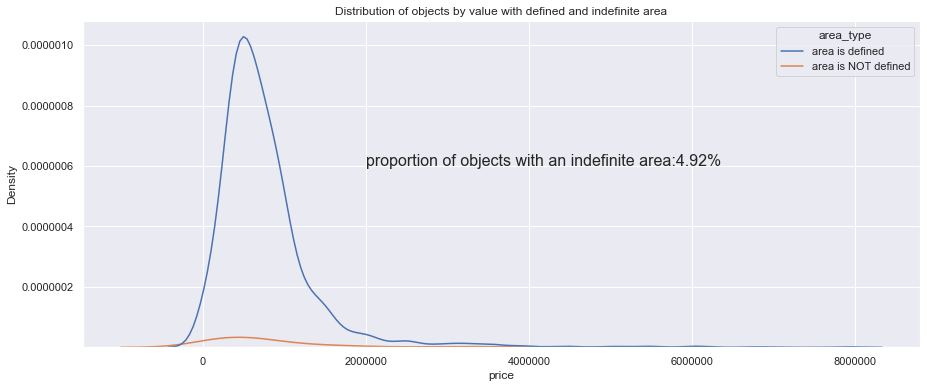

In [24]:
df_sel['area'] = df_sel['area'].where(df_sel['area'] != '> 30', 30)

df_sel.loc[:,'area_type'] = np.select([df_sel.area.isna()], 
                                        ['area is NOT defined'],
                                        default='area is defined')

df_sel_nan = df_sel.query('area.isna()', engine='python')


# we look at how objects with a certain and indefinite area are distributed by cost
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_sel, x='price', hue='area_type', ax=ax)
ax.set_title('Distribution of objects by value with defined and indefinite area')
ax.text(2000000, 
        0.0000006, 
        f'proportion of objects with an indefinite area:{round(100*len(df_sel_nan)/len(df_sel), 2)}%', 
        fontsize=16)
plt.show()

df_sel = df_sel.query('~area.isna()', engine='python')

Despite the fact that there are quite a few objects with an indefinite area, about 5%, we cannot simply discard them. The fact is that the presence or absence of these objects is of little importance for the entire market, but locally in their microdistricts, the accounting or non-registration of these objects can give incorrect price signals. Therefore, the task of determining what type these objects belong to (single or double) remains.

Let's check whether there are anomalies in the size of the area of those objects, the area of which is determined.

In [25]:
df_sel['area'] = df_sel['area'].astype(float)
print(df_sel['area'].describe())

count    2068.000000
mean       22.057805
std        98.105459
min         4.400000
25%        16.000000
50%        18.000000
75%        19.300000
max      3784.000000
Name: area, dtype: float64


Let's see at anomalously large objects

In [26]:
df_sel.query('area > 100')

,name,price,date,description,lat,lng,ad_params,area,area_type
369,"Гараж в Свердловская область, Екатеринбург Эльмаш мкр, ул. Парниковая, 2 (3784.0 м²)",550000,2022-11-02 14:56:10,"В продаже два парковочных места, в собственности у одной семьи, в современном подземном паркинге. Удобно выходить ср...",56.906527,60.617121,Тип объявления=Продам|Вид объекта=Гараж|Площадь=3784.0,3784.0,area is defined
1083,"Гараж в Свердловская область, Екатеринбург ул. Белинского, 41 (2389.3 м²)",2500000,2022-10-25 22:57:09,Продаются два парковочных места в подземном паркинге. Места со стеной. Широкие. Удобно расположены. Стоимость каждог...,56.831339,60.616447,Тип объявления=Продам|Вид объекта=Гараж|Площадь=2389.3,2389.3,area is defined
1491,"Гараж в Свердловская область, Екатеринбург Уралмаш мкр, ул. Орловская, 107 (213.7 м²)",6800000,2022-10-18 01:55:12,"Арт. 31339236. Продается гараж с домом на участке ИЖС! Гараж: площадь 213 кв.м., два этажа. Построен в 2014 году. Га...",56.881261,60.555999,Тип объявления=Продам|Вид объекта=Гараж|Площадь=213.7,213.7,area is defined


In [27]:
# some of the objects area is indicated erroneously. 
# Judging by the description, these objects belong to double parking lots.
#Therefore, we replace their area with 30 m2.
df_sel.loc[369, 'area'] = 30
df_sel.loc[1083, 'area'] = 30

# other objects with an area >100m2 are considered anomalies and removed. 
# According to the meaning of the description, they do not apply to our study.
df_sel = df_sel.query('area <= 100')

Now a new attribute can be introduced into the dataset of objects with a certain area - the attribute of a double place. A place is considered double if its area is greater than or equal to 30 m2. And, if the area is less than 30 m2, then we consider this a single place.

In [28]:
df_sel.loc[:,'double_lot'] = np.select([df_sel.area < 30, df_sel.area >= 30], 
                                          [0, 1])

Let's see how single parking lots, double parking lots and parking lots with an indefinite area are distributed by prices.

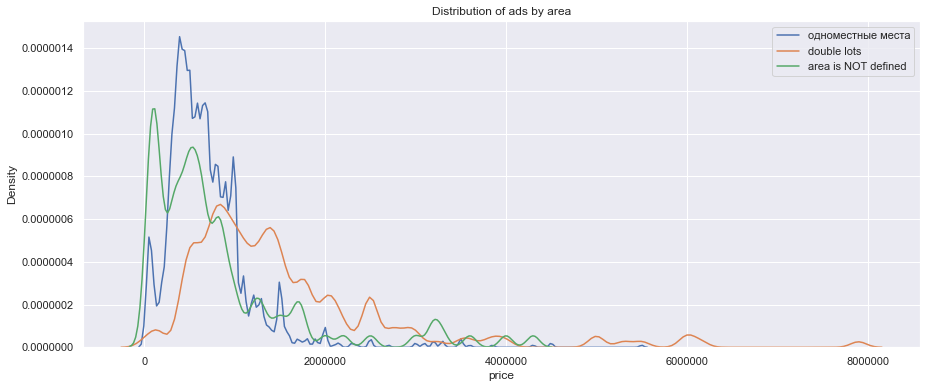

In [29]:
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_sel.query('double_lot == 0'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='одноместные места')

sns.kdeplot(data=df_sel.query('double_lot == 1'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='double lots')

sns.kdeplot(data=df_sel_nan, 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='area is NOT defined')
ax.legend(loc="upper right")
plt.title('Distribution of ads by price')
plt.show()

As can be seen from the graph, the distribution curve for double parking is shifted to the right, which is quite obvious, because. most often they are more expensive than single ones. The distribution curve of objects for which the area is not determined is more like the distribution curve of single objects. However, it cannot be concluded from this that all objects with an indefinite area are single parking lots, since the distribution curve shows that there are very expensive objects among them.

Therefore, it is necessary to allocate double places from objects with an indefinite area in a different way. Let's try to highlight the words that are typical for single and double objects from the descriptions given by the owners.

In [30]:
# first, we set a list of the most commonly used words 
# that are equally often used in ads for the sale of single and double parking lots
sw = ['продам', 'в', 'на', 'и', 'с', 'по', 'гараж', 'не', 'для', '-',
      'есть', 'под', 'паркинг', 'продается', 'место', 'из', 'паркинге', 'бокс', 'можно', ',',
      'кв.', 'кв.м.', 'за', 'въезд', 'рядом', 'до', 'или', 'жк', 'к', 'все']

def most_common_words(df):
    # The most_common_words function takes a dataframe as input and determines 
    # the TOP 30 most common words, divided by ad type
    description_0 = " ".join(df.query('double_lot == 0')["description"])
    words_0 = [word for word in description_0.split() if word.lower() not in sw]
    description_0 = " ".join(words_0)
    most_common_words_0 = pd.DataFrame(Counter(description_0.split()).most_common(30),
                                        columns = ['single','quantity'])

    description_1 = " ".join(df.query('double_lot == 1')["description"])
    words_1 = [word for word in description_1.split() if word.lower() not in sw]
    description_1 = " ".join(words_1)
    most_common_words_1 = pd.DataFrame(Counter(description_1.split()).most_common(30),
                                        columns = ['double','quantity'])

    return (most_common_words_0
            .join(most_common_words_1, rsuffix='_1')
            .drop(columns = ['quantity','quantity_1'])
            )
most_common_words(df_sel)

,single,double
0,подземном,2
1,парковочное,два
2,от,смотровая
3,ул.,подземном
4,.,через
5,капитальный,находится
6,2,площадью
7,базе:,от
8,машиноместо,ворота
9,ворота,площадь


It cannot be said that this method made it possible to uniquely differentiate objects by the number of places, but the results are quite expected. For example, the fact that the words "2" and "two" are in the first and second place in terms of the most frequently occurring words among double objects. Also, it is interesting that in third place is the word "viewing". Indeed, inspection pits are more common in large garages. (For single objects "viewing" only on the 27th place)

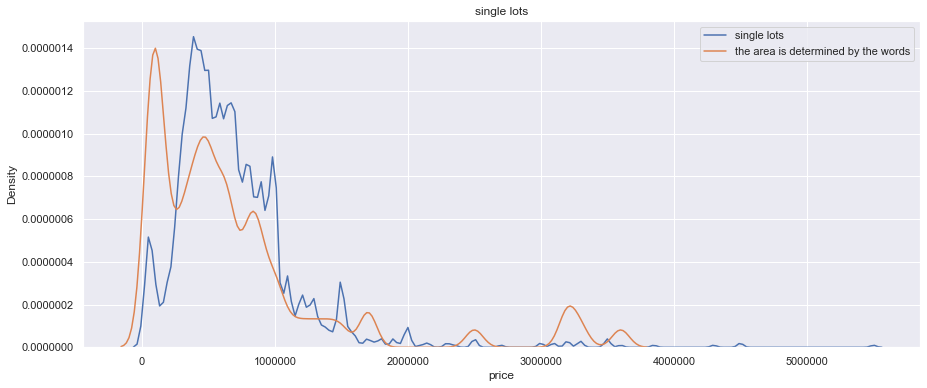

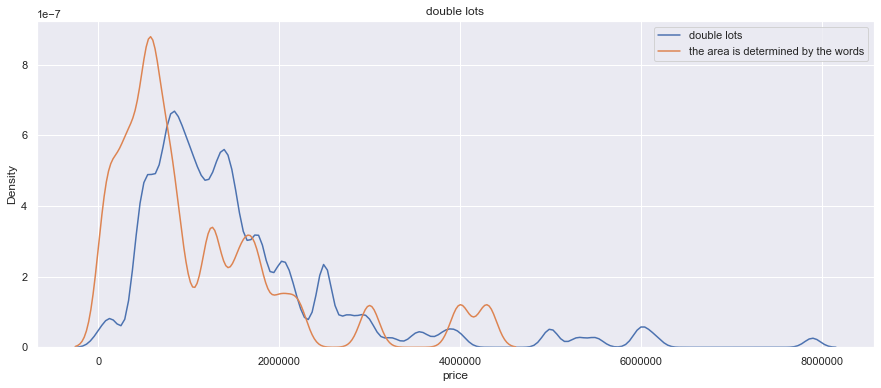

In [32]:
df_sel_nan['description'] = df_sel_nan['description'].str.lower()

# create a list of words that are most likely to be found in advertisements for the sale of double parking lots
searchfor = ['2 машиноместа', '2 паркинга', '2 гаража', 'двойное', 
             'семейное', 'семейный', 'два', 'две', 'Два', 'места']

# in the dataset of objects with an indefinite area, we create the attribute "double_place" 
# and fill it in according to the principle: 
# if the description contains words from searchfor, then we classify this ad as a double
df_sel_nan.loc[:,'double_lot'] = np.select([df_sel_nan['description'].str.contains('|'.join(searchfor))], [1], [0])


# compare the distribution of ads with newly defined features 
# and the distribution of ads for which the feature was known in advance
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_sel.query('double_lot == 0'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='single lots')
sns.kdeplot(data=df_sel_nan.query('double_lot == 0'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='the area is determined by the words')
ax.legend(loc="upper right")
plt.title('single lots')

fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_sel.query('double_lot == 1'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='double lots')
sns.kdeplot(data=df_sel_nan.query('double_lot == 1'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='the area is determined by the words')
ax.legend(loc="upper right")
plt.title('double lots')
plt.show()

The graph shows that the distribution curves of ads with newly defined features and ads for which the feature was previously known are similar to each other

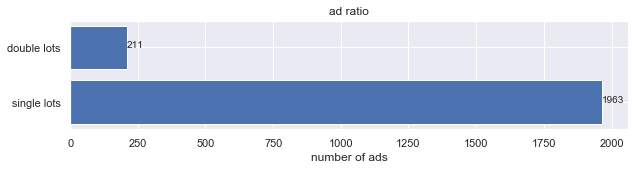

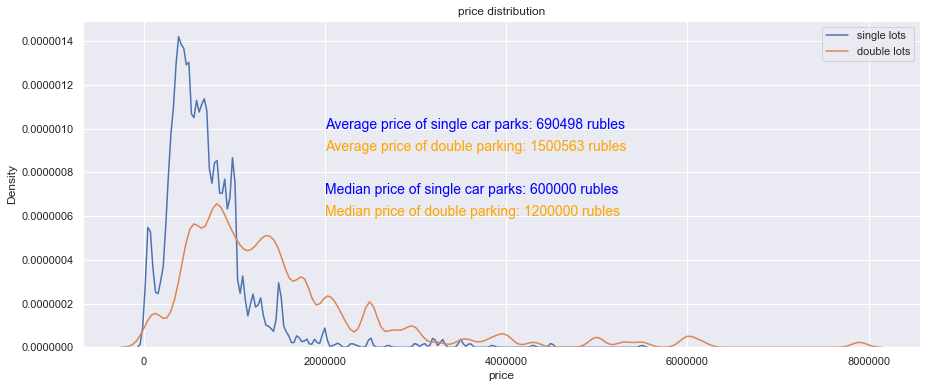

In [34]:
# create a final dataset with single objects for sale
df_sel_single_slot = pd.concat([df_sel.query('double_lot == 0'), df_sel_nan.query('double_lot == 0')], 
                              ignore_index=True)

# and with double objects for sale
df_sel_duble_slot = pd.concat([df_sel.query('double_lot == 1'), df_sel_nan.query('double_lot == 1')], 
                              ignore_index=True)

def addlabels(x,y):
    for i in range(len(y)):
        plt.text(y[i], x[i], y[i])
        
x=['single lots','double lots']
y=[len(df_sel_single_slot), len(df_sel_duble_slot)]

plt.figure(figsize = (10, 2))
plt.barh(x, y)
addlabels(x, y)
plt.title("ad ratio")
plt.xlabel("number of ads")
plt.show()


fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_sel_single_slot, 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='single lots')
sns.kdeplot(data=df_sel_duble_slot, 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='double lots')
ax.text(2000000, 
        0.0000010, 
        f'Average price of single car parks: {round(df_sel_single_slot.price.mean())} rubles', 
        color='blue',
        fontsize=14)
ax.text(2000000, 
        0.0000009, 
        f'Average price of double parking: {round(df_sel_duble_slot.price.mean())} rubles', 
        color='orange',
        fontsize=14)
ax.text(2000000, 
        0.0000007, 
        f'Median price of single car parks: {round(df_sel_single_slot.price.median())} rubles', 
        color='blue',
        fontsize=14)
ax.text(2000000, 
        0.0000006, 
        f'Median price of double parking: {round(df_sel_duble_slot.price.median())} rubles', 
        color='orange',
        fontsize=14)        
ax.legend(loc="upper right")
plt.title('price distribution')
plt.show()

#### Exposure time

Let's see how long the objects are on sale and how the objects are distributed according to the exposition period

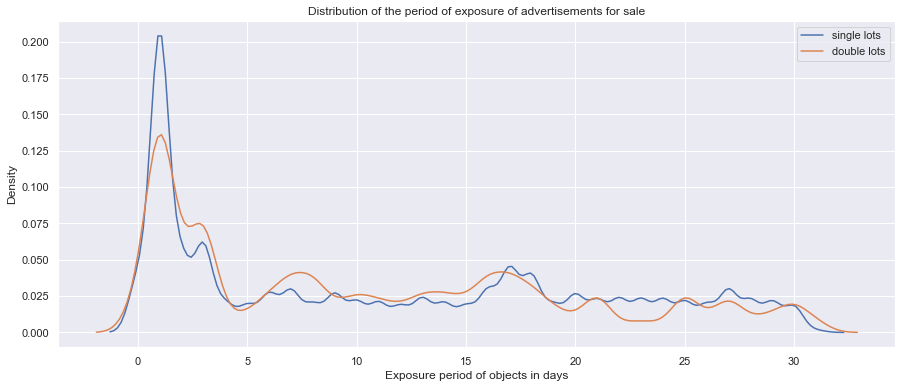

In [36]:
df_sel_single_slot = df_sel_single_slot.drop(columns=['area_type', 'double_lot'])
df_sel_duble_slot = df_sel_duble_slot.drop(columns=['area_type', 'double_lot'])

# calculate the exposure time of the object in days from the current date
curent_date = pd.to_datetime(datetime.now())
delta = curent_date - df_sel_single_slot.date.max()
delta = delta.days
df_sel_single_slot['expo'] = curent_date - df_sel_single_slot.date
df_sel_single_slot['expo'] = df_sel_single_slot['expo'].apply(lambda x: int(x.days))
df_sel_single_slot['expo'] = df_sel_single_slot['expo'] - delta

df_sel_duble_slot['expo'] = curent_date - df_sel_duble_slot.date
df_sel_duble_slot['expo'] = df_sel_duble_slot['expo'].apply(lambda x: int(x.days))
df_sel_duble_slot['expo'] = df_sel_duble_slot['expo'] - delta

fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_sel_single_slot, 
            x='expo', 
            bw_adjust=.2, 
            ax=ax, 
            label='single lots')
sns.kdeplot(data=df_sel_duble_slot, 
            x='expo', 
            bw_adjust=.2, 
            ax=ax, 
            label='double lots')
ax.legend(loc="upper right")
plt.xlabel('Exposure period of objects in days')
plt.title('Distribution of the period of exposure of advertisements for sale')
plt.show()

### Data on properties for rent

In [37]:
df_rent_initial = pd.read_csv(r'E:/EZG/PARKINGS/objects_for_rent.csv', sep=';')
df_rent = df_rent_initial.copy()
display(df_rent.head(2))
display(df_rent.info())

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,Адрес,Описание,Тип объявления,Категория1,Категория2,ID на сайте,Источник,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км"
0,Машиноместо,2000,2022-11-03 17:54:13,89826119217,Мобильные ТелеСистемы,недоступно,Частное лицо (фильтр),Свердловская область,Екатеринбург,Уральская,"ул. Азина, 22/7","Сдам мотоместо (кладовка), площадь 3,9 м.кв. (1200х3250мм). Возможно хранение мото техники, велосипедов, колясок и д...",Сдам,Недвижимость,Гаражи и машиноместа,2463557225,avito.ru,56.856245,60.609611,NaN,Тип объявления=Сдам|Вид объекта=Машиноместо|Тип машиноместа=Подземный паркинг|Охрана=Да,https://www.avito.ru/ekaterinburg/garazhi_i_mashinomesta/mashinomesto_2463557225,https://65.img.avito.st/image/1/1.iOoAErayJAM2paYOHFzP4tGxJAWgtyY.hvYn88aHBBHQYAXJ7fN3R1wDbGVzMWmwEF1_GYy5vOg,Свердловская область,да,0.60000002384186
1,"Гараж в Свердловская область, Екатеринбург ул. Среднеуральская, 9 (14.0 м²)",4000,2022-11-03 15:24:32,89827419440,Мобильные ТелеСистемы,ID96956628,Агентство,Свердловская область,Екатеринбург,Уральская,"ул. Среднеуральская, 9","Машиноместо,отопление,всегда сухо,регулярно проводится уборка,видео,охрана.",Сдам,Недвижимость,Гаражи и машиноместа,279723142,cian.ru,56.854128,60.584898,NaN,Тип объявления=Сдам|Вид объекта=Гараж|Площадь=14.0,https://www.cian.ru/rent/commercial/279723142,"https://cdn-p.cian.site/images/58/479/041/garazh-ekaterinburg-sredneuralskaya-ulica-1409748562-1.jpg,https://cdn-p.c...",Свердловская область,да,1.333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Название                            1047 non-null   object 
 1   Цена                                1047 non-null   int64  
 2   Дата                                1047 non-null   object 
 3   Телефон                             1047 non-null   int64  
 4   Оператор                            1047 non-null   object 
 5   Контактное лицо (автор объявления)  1047 non-null   object 
 6   Тип автора                          1047 non-null   object 
 7   Регион                              1047 non-null   object 
 8   Город                               1047 non-null   object 
 9   Метро/Район                         1036 non-null   object 
 10  Адрес                               1046 non-null   object 
 11  Описание                            1047 no

None

In [38]:
display(nan_values(df_rent))

print('Duplicates removed:', df_rent.duplicated().sum())

print('Implicit duplicates removed:', df_rent.duplicated(subset=['Описание', 'Цена']).sum())

df_rent = df_rent.drop_duplicates(subset=['Описание', 'Цена'])

,count_mising,percent_missing
Метро/Район,11,1.05
Адрес,1,0.10
Персона для контактов,1047,100.00
Ссылки на картинки,163,15.57


Duplicates removed: 0
Implicit duplicates removed: 26


<div class="alert alert-warning">
<b>PROBLEM:</b> Similar to the objects for sale, some of the objects for rent are multi-space parking lots and garages (most often double). </div>


<div class="alert alert-success">
<b>SOLUTION:</b> Similarly, we will divide all ads into conditionally single and double parking lots.</div>

In [39]:
df_rent=df_rent[['Название', 'Цена', 'Дата', 'Описание', 'lat', 'lng', 'Доп.параметры']]
df_rent = df_rent.rename(columns={'Название':'name',
                                  'Цена':'price',
                                  'Дата':'date',
                                  'Описание':'description',
                                  'Доп.параметры':'ad_params'})

# приводим тип данных в колонке "Дата" к типу Satetime
df_rent['date'] = pd.to_datetime(df_rent['date'])

df_rent['ad_params'] = df_rent['ad_params'].where(df_rent['ad_params'].str.contains('Площадь'), 
                                                        other=np.nan)

df_rent['area'] = df_rent['ad_params'].str.split('Площадь=').str[-1]

display(df_rent.head())

display(df_rent['area'].unique())

,name,price,date,description,lat,lng,ad_params,area
0,Машиноместо,2000,2022-11-03 17:54:13,"Сдам мотоместо (кладовка), площадь 3,9 м.кв. (1200х3250мм). Возможно хранение мото техники, велосипедов, колясок и д...",56.856245,60.609611,NaN,NaN
1,"Гараж в Свердловская область, Екатеринбург ул. Среднеуральская, 9 (14.0 м²)",4000,2022-11-03 15:24:32,"Машиноместо,отопление,всегда сухо,регулярно проводится уборка,видео,охрана.",56.854128,60.584898,Тип объявления=Сдам|Вид объекта=Гараж|Площадь=14.0,14.0
2,"Гараж, 18 м²",7000,2022-11-03 14:38:11,"Сдам гараж, под склад на длительный срок, есть охрана, гараж сухой",56.854645,60.621832,Тип объявления=Сдам|Вид объекта=Гараж|Тип гаража=Кирпичный|Охрана=Да|Площадь=18,18
3,"Машиноместо, 15 м²",3200,2022-11-03 13:11:35,Академический район. Сдам паркинг. Долгосрочная аренда. Коммунальные платежи включены в стоимость.,56.792913,60.518745,Тип объявления=Сдам|Вид объекта=Машиноместо|Тип машиноместа=Подземный паркинг|Охрана=Да|Площадь=15,15
4,"Машиноместо, 20 м²",8000,2022-11-03 12:43:08,Сдаётся в аренду парковка в ЖК Нагорный -2 этаж. Под 20 домом,56.836216,60.564182,Тип объявления=Сдам|Вид объекта=Машиноместо|Тип машиноместа=Подземный паркинг|Охрана=Да|Площадь=20,20


array([nan, '14.0', '18', '15', '20', '16.4', '> 30', '17', '18.0',
       '20.0', '17.5', '13', '17.0', '13.9', '15.0', '13.0', '14.1',
       '10.58', '22', '50.0', '16.0', '19.0', '13.3', '28.0', '14',
       '54.0', '15.2', '24.0', '29.1', '16.2', '21', '17.2', '18.1',
       '15.7', '23', '75.0', '14.6', '14.5', '14.3', '80.0', '23.0',
       '15.5', '22.0', '15.4', '27.9', '44.0', '15.6', '30.0', '13.4',
       '17.4', '15.3', '16.6', '10.0', '21.0', '16', '30', '13.7', '36.0',
       '40.0', '16.5', '27', '19', '12.5', '25.0', '17.9', '16.82', '24',
       '13.25', '20.52', '25', '12', '10', '11', '31.0', '37.7', '28',
       '4.5', '18.5', '42.0', '29', '26', '21.5', '13.8', '14.4', '29.0',
       '16.7', '27.0', '16.8', '32.0', '6.0', '35.0'], dtype=object)

In [41]:
df_rent['area'] = df_rent['area'].where(df_rent['area'] != '> 30', 30)

df_rent.loc[:,'area_type'] = np.select([df_rent.area.isna()], 
                                         ['area is NOT defined'],
                                         default='area is defined')

Consider properties with abnormally high rental prices

In [42]:
df_rent.query('price > 50000')

,name,price,date,description,lat,lng,ad_params,area,area_type
91,"Гараж в Свердловская область, Екатеринбург Юго-Западный мкр, ул. Шаумяна, 87 (14.6 м²)",1130000,2022-11-02 14:25:51,"Продаю парковочное место в ЖК ""Лига чемпионов"". Общая площадь 14,6 м2. Круглосуточная охрана.",56.813153,60.572160,Тип объявления=Сдам|Вид объекта=Гараж|Площадь=14.6,14.6,area is defined
474,"Гараж, > 30 м²",80000,2022-10-22 19:48:56,Сдам в долгосрочную аренду Автосервис 160 квадратных метров(по замерам БТИ) по адресу: г.Екатеринбург Переулок Базов...,56.820242,60.653197,Тип объявления=Сдам|Вид объекта=Гараж|Тип гаража=Кирпичный|Охрана=Да|Площадь=> 30,30,area is defined
547,"Машиноместо, > 30 м²",300000,2022-10-20 11:42:40,3500 м2 асфальтированной территории,56.898215,60.517641,Тип объявления=Сдам|Вид объекта=Машиноместо|Тип машиноместа=Открытая стоянка|Охрана=Да|Площадь=> 30,30,area is defined
786,"Гараж, > 30 м²",65000,2022-10-12 15:16:22,"Тёплый бокс , Подъёмник , коммунальные оплачиваются отдельно",56.811438,60.612444,Тип объявления=Сдам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Да|Площадь=> 30,30,area is defined


Judging by the description, such objects are purely commercial, moreover, there are very few of them. Therefore, we consider it possible to simply remove them

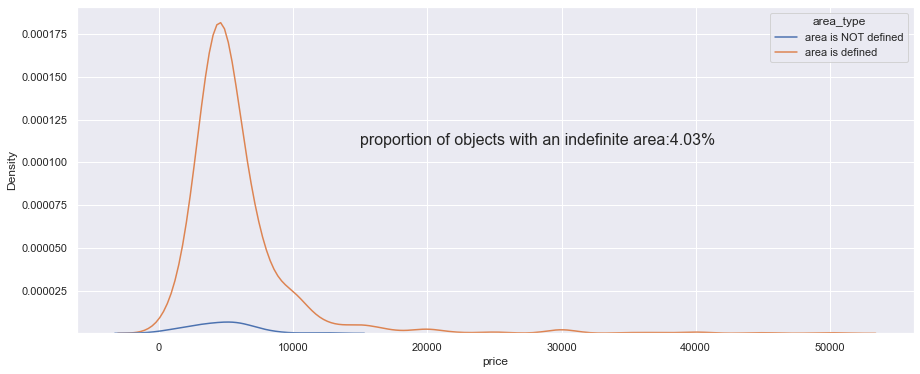

In [43]:
df_rent = df_rent.query('price <= 50000')

df_rent_nan = df_rent.query('area.isna()', engine='python')

fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_rent, x='price', hue='area_type', ax=ax)
ax.text(15000, 
        0.00011, 
        f'proportion of objects with an indefinite area:{round(100*len(df_rent_nan)/len(df_rent), 2)}%', 
        fontsize=16)
plt.show()

df_rent = df_rent.query('~area.isna()', engine='python')

#### Separation of objects by type: single-double


Now a new attribute can be introduced into the dataset of objects with a certain area - the attribute of a double place. A place is considered double if its area is greater than or equal to 30 m2. And, if the area is less than 30 m2, then we consider this a single lot.

In [44]:
df_rent.area = df_rent.area.astype(float)
df_rent.loc[:,'double_lot'] = np.select([df_rent.area < 30, df_rent.area >= 30], 
                                          [0, 1])

Let's see how single parking lots, double parking lots and parking lots with an indefinite area are distributed by prices.

Text(0.5, 1.0, 'Distribution of ads by price')

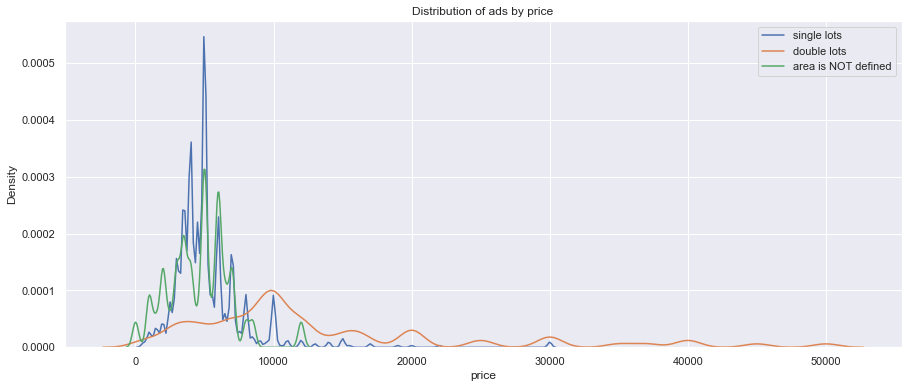

In [45]:
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_rent.query('double_lot == 0'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='single lots')

sns.kdeplot(data=df_rent.query('double_lot == 1'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='double lots')

sns.kdeplot(data=df_rent_nan, 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='area is NOT defined')
ax.legend(loc="upper right")

plt.title('Distribution of ads by price')
ax.legend(loc="upper right")
plt.title('Distribution of ads by price')

Similar to what we did with the objects for sale, we will single out single and double places among the objects for rent according to the description

In [46]:
sw = ['сдам', 'в', 'на', 'и', 'с', 'по', 'гараж', 'не', 'для', '-',
      'есть', 'под', 'паркинг', 'сдается', 'место', 'из', 'паркинге', 'бокс', 'можно', ',',
      'кв.', 'кв.м.', 'за', 'въезд', 'рядом', 'до', 'или', 'жк', 'к', 'все']

most_common_words(df_rent)

,single,double
0,длительный,2
1,аренду,два
2,парковочное,аренду
3,включены,при
4,срок,гаража
5,подземном,"охрана,"
6,машиноместо,длительный
7,Коммунальные,от
8,срок.,"видеонаблюдение,"
9,от,через


Text(0.5, 1.0, 'double lots')

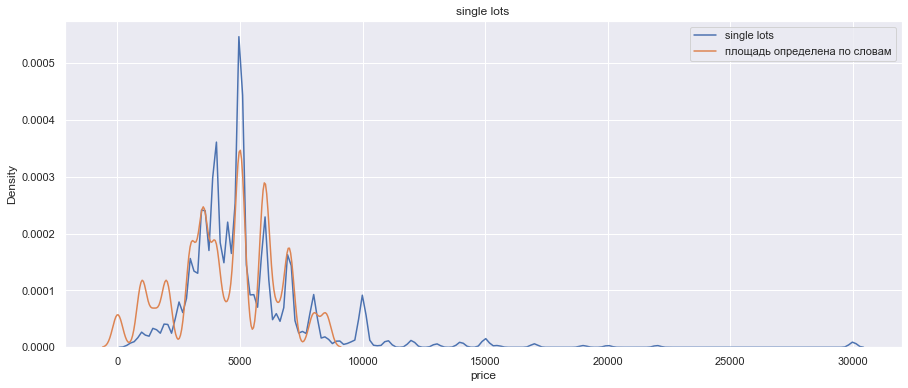

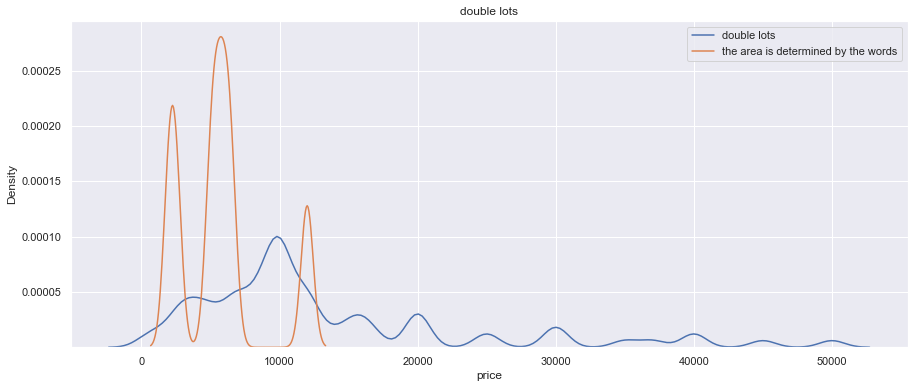

In [48]:
df_rent_nan['description'] = df_rent_nan['description'].str.lower()

searchfor = ['2 машиноместа', '2 паркинга', '2 гаража', 'двойное', 
             'семейное', 'семейный', 'два', 'две', 'Два', 'места']

df_rent_nan.loc[:,'double_lot'] = np.select([df_rent_nan['description'].str.contains('|'.join(searchfor))], [1], [0])

fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_rent.query('double_lot == 0'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='single lots')
sns.kdeplot(data=df_rent_nan.query('double_lot == 0'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='площадь определена по словам')
ax.legend(loc="upper right")
plt.title('single lots')

fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_rent.query('double_lot == 1'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='double lots')
sns.kdeplot(data=df_rent_nan.query('double_lot == 1'), 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='the area is determined by the words')
ax.legend(loc="upper right")
plt.title('double lots')

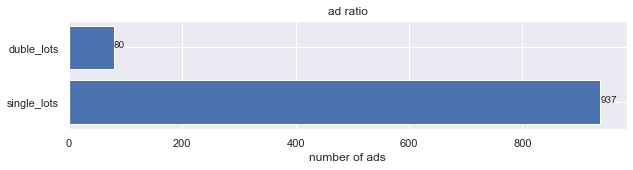

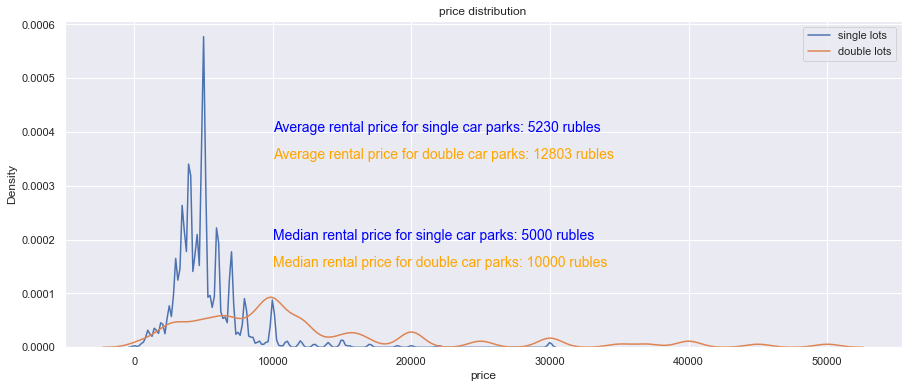

In [49]:
# we create a final dataset with single-occupancy objects for rent
df_rent_single_slot = pd.concat([df_rent.query('double_lot == 0'), df_rent_nan.query('double_lot == 0')], 
                              ignore_index=True)

# and with double-occupancy objects for rent
df_rent_duble_slot = pd.concat([df_rent.query('double_lot == 1'), df_rent_nan.query('double_lot == 1')], 
                              ignore_index=True)

x=['single_lots','duble_lots']
y=[len(df_rent_single_slot), len(df_rent_duble_slot)]

plt.figure(figsize = (10, 2))
plt.barh(x, y)
addlabels(x, y)
plt.title("ad ratio")
plt.xlabel("number of ads")
plt.show()


fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_rent_single_slot, 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='single lots')
sns.kdeplot(data=df_rent_duble_slot, 
            x='price', 
            bw_adjust=.2, 
            ax=ax, 
            label='double lots')
ax.text(10000, 
        0.0004, 
        f'Average rental price for single car parks: {round(df_rent_single_slot.price.mean())} rubles', 
        color='blue',
        fontsize=14)
ax.text(10000, 
        0.00035, 
        f'Average rental price for double car parks: {round(df_rent_duble_slot.price.mean())} rubles', 
        color='orange',
        fontsize=14)
ax.text(10000, 
        0.0002, 
        f'Median rental price for single car parks: {round(df_rent_single_slot.price.median())} rubles', 
        color='blue',
        fontsize=14)
ax.text(10000, 
        0.00015, 
        f'Median rental price for double car parks: {round(df_rent_duble_slot.price.median())} rubles', 
        color='orange',
        fontsize=14)     
ax.legend(loc="upper right")
plt.title('price distribution')
plt.show()

#### Exposure time

Consider how long the objects are on sale and how the objects are distributed according to the exposition period

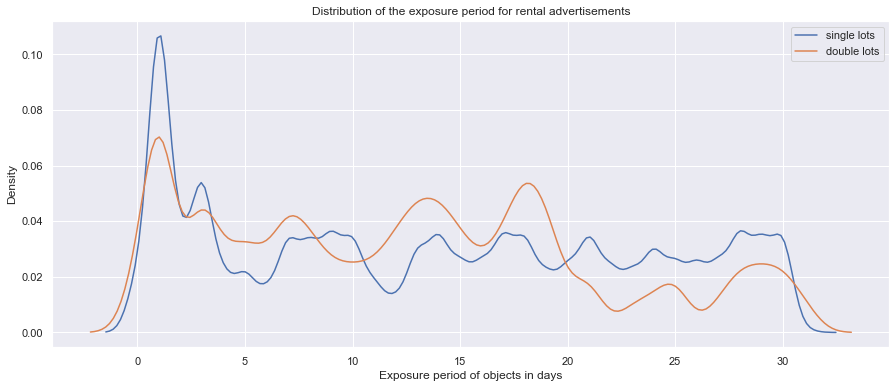

In [50]:
df_rent_single_slot = df_rent_single_slot.drop(columns=['area_type', 'double_lot'])
df_rent_duble_slot = df_rent_duble_slot.drop(columns=['area_type', 'double_lot'])

# calculate the exposure time of the object in days from the current date

df_rent_single_slot['expo'] = curent_date - df_rent_single_slot.date
df_rent_single_slot['expo'] = df_rent_single_slot['expo'].apply(lambda x: int(x.days))
df_rent_single_slot['expo'] = df_rent_single_slot['expo'] - delta

df_rent_duble_slot['expo'] = curent_date - df_rent_duble_slot.date
df_rent_duble_slot['expo'] = df_rent_duble_slot['expo'].apply(lambda x: int(x.days))
df_rent_duble_slot['expo'] = df_rent_duble_slot['expo'] - delta

fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_rent_single_slot, 
            x='expo', 
            bw_adjust=.2, 
            ax=ax, 
            label='single lots')
sns.kdeplot(data=df_rent_duble_slot, 
            x='expo', 
            bw_adjust=.2, 
            ax=ax, 
            label='double lots')
ax.legend(loc="upper right")
plt.xlabel('Exposure period of objects in days')
plt.title('Distribution of the exposure period for rental advertisements')
plt.show()

## Search for investment objects


The task of determining the most interesting objects for investment is as follows. Among all the objects put up for sale, you need to find those that are located in areas of increased rental demand. Those. where the highest rental rates are formed. And if the ratio of the price of an object for sale and the average (or median) rental price in this area is at a certain level, which ensures a return on investment within a given timeframe, then such an object is promising in terms of investment to rent it out.


To solve this problem, it is necessary to form zones (clusters) on a territorial basis. To do this, we use the latitude and longitude of the location of objects. Partitioning into clusters is carried out by the KMeans algorithm.

### Definition of rental clusters

In [28]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(df_rent_single_slot[['lat','lng']])

Подбираем число кластеров, которое обеспечит наиболее эффективное разбиение. Эффективность определяем по метрике silhouette_score.

В качестве обучающей модели используем метод К ближайших соседий KNeighborsClassifier. И для начала, подбираем налучший параметр n_neighbors - то самое число соседий, по которому модель определяет, к какому кластеру должен относиться объект. Поиск налучшего значения можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля.

Проверим, чему равна точность на тестовой выборке при этом значении параметра

In [29]:
warnings.simplefilter('ignore')
number_of_clusters=[]
slhtte_score = []
bce = []
bnn = []
r2 = []
accuracy = []
for n in range(50, 550, 50):
    km = KMeans(n_clusters=n, random_state=0) # задаём число кластеров, равное n, 
                                              # и фиксируем значение random_state для воспроизводимости результата
    labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 
    
    number_of_clusters.append(n)
    slhtte_score.append(silhouette_score(X_sc, labels))
    
    # сохраняем метки кластера в поле нашего датасета
    df_rent_single_slot['rent_cluster'] = labels
    
    # создаем обучающую и валидационную выборки
    X_train, X_test, y_train, y_test = train_test_split(df_rent_single_slot[['lat','lng']], 
                                                    df_rent_single_slot['rent_cluster'], 
                                                    test_size=0.2)

    # задаем возможные варианты числа n_neighbors
    n_neighbors_array = [1, 3, 5, 7, 10, 15]
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
    grid.fit(X_train, y_train)
    
    #  поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля.
    best_cv_err = 1 - grid.best_score_
    best_n_neighbors = grid.best_estimator_.n_neighbors
    
    bce.append(best_cv_err)
    bnn.append(best_n_neighbors)
    
    # обучаем модель
    knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
    knn.fit(X_train, y_train)
    
    # опробуем модель на тестовой выборке
    validates = knn.predict(X_test)
    
    # оцениваем результат
    r2.append(r2_score(y_test, validates))
    accuracy.append(accuracy_score(y_test, validates))

    
k_means_results = pd.DataFrame({'number_of_clusters':number_of_clusters,
                                'silhouette_score':slhtte_score,
                                'best_cv_err':bce,
                                'best_n_neighbors':bnn,
                                'r2':r2,
                                'accuracy':accuracy})

k_means_results

,number_of_clusters,silhouette_score,best_cv_err,best_n_neighbors,r2,accuracy
0,50,0.535198,0.036048,1,0.935548,0.973404
1,100,0.603181,0.041389,1,0.953233,0.984043
2,150,0.626958,0.060080,1,0.812297,0.936170
3,200,0.634623,0.096128,1,0.827825,0.914894
4,250,0.635302,0.136182,1,0.615000,0.877660
5,300,0.642013,0.168224,1,0.570237,0.845745
6,350,0.655769,0.209613,1,0.334154,0.771277
7,400,0.652488,0.246996,1,0.388374,0.696809
8,450,0.631905,0.331108,1,0.308233,0.734043
9,500,0.606990,0.389853,1,-0.040072,0.617021


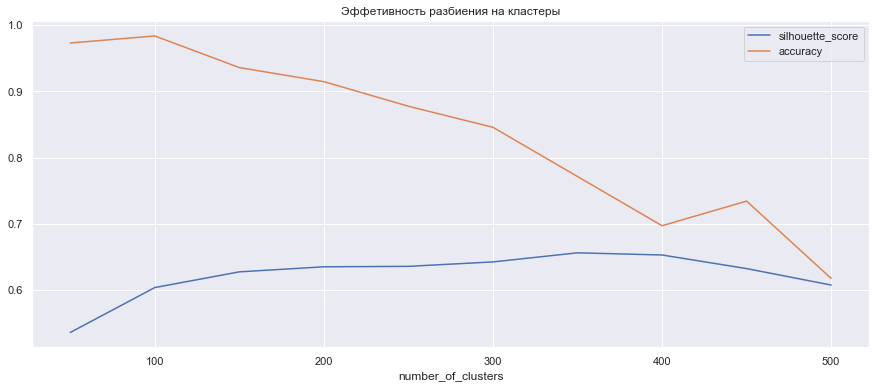

In [30]:
k_means_results.plot(x='number_of_clusters',
                     y=['silhouette_score', 'accuracy'],
                     figsize=(15,6),
                     title='Эффетивность разбиения на кластеры')

Наиболее эффективное разбиение на кластеры достигается при количестве кластеров равном 150. Точность и значение silhouette_score при этом значении практически максимальные.

In [31]:
warnings.simplefilter('ignore')
km = KMeans(n_clusters=150, random_state=0) # задаём число кластеров, равное 150, 
                                          # и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

# сохраняем метки кластера в поле нашего датасета
df_rent_single_slot['rent_cluster'] = labels

In [32]:
# выводим статистику по средним значениям координат по кластеру
# Цену берем среднюю среди всех объявлений об аренде, относящихся к этому кластеру
rent_clusters = df_rent_single_slot.groupby(['rent_cluster']).agg({'lat':'mean',
                                                                   'lng':'mean',
                                                                   'Цена':'mean'}).sort_values(by='Цена')
rent_clusters.head()

,lat,lng,Цена
rent_cluster,,,
124,56.749741,60.605701,2000.000000
143,56.908984,60.619161,2150.000000
79,56.824888,60.689246,2333.333333
86,56.763135,60.612207,2500.000000
30,56.876128,60.525133,2500.000000


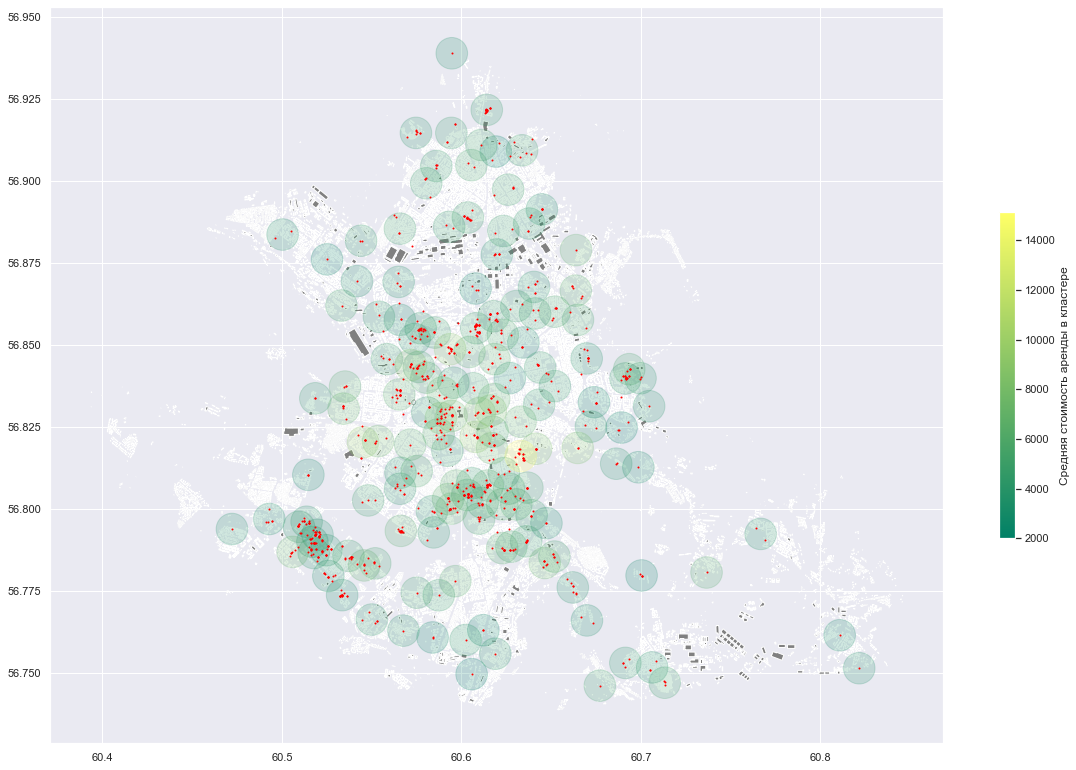

In [33]:
city_map = gpd.read_file('E:\EZG\PARKINGS\ekb_shp\ekb.shp')
loc_crs = {'init': 'epsg:4326'}
loc_geom_rent_clusters = [Point(xy) for xy in zip(rent_clusters['lng'], rent_clusters['lat'])]
geo_rent_clusters = gpd.GeoDataFrame(rent_clusters, crs=loc_crs, geometry=loc_geom_rent_clusters)

loc_geom_df_rent_single_slot = [Point(xy) for xy in zip(df_rent_single_slot['lng'], df_rent_single_slot['lat'])]
geo_loc_df_rent_single_slot = gpd.GeoDataFrame(df_rent_single_slot, crs=loc_crs, geometry=loc_geom_df_rent_single_slot)

fig, ax = plt.subplots(figsize = (20,20))
city_map.plot(ax=ax, color='grey')
#кластеры
geo_rent_clusters.plot(column = 'Цена', 
                       ax=ax, 
                       cmap = 'summer',
                       legend = True, 
                       legend_kwds={'shrink': 0.3, 
                                    'label':"Средняя стоимость аренды в кластере"},
                       markersize = 1000,
                       alpha = .2)
geo_loc_df_rent_single_slot.plot(ax=ax,
                                 color = 'red',
                                 markersize = 1)

plt.savefig('Heat Map')

На карте изображены кластеры с градацией цвета в зависимости от медианной стоимости аренды внутри кластера. Географическими центрами кластеров являются средние значения широт и долгот объектов, относящихся к данному кластеру. Красными точками нанесены сами объекты - паркинги сдающиеся в аренду.

### Создание и обучение модели - классификатора

Теперь, когда у нас определены кластеры, создадим модель, которая по каординатам объекта сможет определить, к какому кластеру относится этот объект.

В качестве обучающей модели используем метод К ближайших соседий KNeighborsClassifier. Параметр n_neighbors принимаем равным 1 - именно это значение обеспечивает наименьшую ошибку перекрестного контроля.

Проверим, чему равна ошибка на тестовой выборке при этом значении параметра

In [34]:
# создаем обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(df_rent_single_slot[['lat','lng']], 
                                                    df_rent_single_slot['rent_cluster'], 
                                                    test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
validates = knn.predict(X_test)

print('R2: {:.2f}'.format(r2_score(y_test, validates)))
print('Точность: {:.2f}'.format(accuracy_score(y_test, validates)))

R2: 0.90
Точность: 0.96


In [35]:
rent_clusters = rent_clusters.rename(columns={'Цена':'стоимость_аренды_в_кластере'})

Для каждого объекта из датасета df_sel_single_slot (продажа одноместных паркингов) определяем, к какому из кластеров этот объект относится.

In [36]:
predicrions = knn.predict(df_sel_single_slot[['lat','lng']])
df_sel_single_slot['rent_cluster'] = predicrions
df_sel_single_slot = df_sel_single_slot.merge(rent_clusters['стоимость_аренды_в_кластере'], on='rent_cluster')
df_sel_single_slot.head(2)

,Название,Цена,Дата,Описание,lat,lng,Доп.параметры,площадь,expo,rent_cluster,стоимость_аренды_в_кластере
0,"Гараж в Свердловская область, Екатеринбург Уралмаш мкр, ул. Кировградская, 28 (18.0 м²)",850000,2022-11-03 23:54:27,"Продам теплый бокс в подземном паркинге, 18м2. заезд с ул. Кировградская д. 28. Очень удобный заезд в сам бокс, уста...",56.890949,60.597277,Тип объявления=Продам|Вид объекта=Гараж|Площадь=18.0,18.0,0,2,4912.5
1,"Гараж в Свердловская область, Екатеринбург Уралмаш мкр, ул. Кузнецова, 2Б (15.5 м²)",700000,2022-11-02 03:54:07,Продаем одно из последних машиномест в деловом центре ASK. - въезд в паркинг с улицы Кузнецова; - минус 1 уровень па...,56.887807,60.607769,Тип объявления=Продам|Вид объекта=Гараж|Площадь=15.5,15.5,2,2,4912.5


И то же самое для двухместных паркингов

In [37]:
predicrions = knn.predict(df_sel_duble_slot[['lat','lng']])
df_sel_duble_slot['rent_cluster'] = predicrions
df_sel_duble_slot = df_sel_duble_slot.merge(rent_clusters['стоимость_аренды_в_кластере'], on='rent_cluster')
df_sel_duble_slot.head(2)

,Название,Цена,Дата,Описание,lat,lng,Доп.параметры,площадь,expo,rent_cluster,стоимость_аренды_в_кластере
0,"Гараж, > 30 м²",1500000,2022-11-03 20:57:12,"Продам капитальный гараж площадью 45кв/м . Есть полноценная смотровая яма во всю длину, канализация, вода- горячая, ...",56.774559,60.575134,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Да|Площадь=> 30,30.0,0,109,4500.0
1,"Гараж в Свердловская область, Екатеринбург ул. Дорожная, 35 (45.0 м²)",1500000,2022-10-31 18:57:55,"Продам капитальный гараж площадью 45кв/м . Есть полноценная смотровая яма во всю длину, канализация, вода- горячая, ...",56.774559,60.575133,Тип объявления=Продам|Вид объекта=Гараж|Площадь=45.0,45.0,3,109,4500.0


Определяем для каждого объекта, выставленного на продажу срок окупаемости в месяцах payback. Срок окупаемости находится делением стоимости объекта на медианную арендную ставку кластера.

In [38]:
df_sel_single_slot['payback'] = round(df_sel_single_slot['Цена'] / df_sel_single_slot['стоимость_аренды_в_кластере'])
#для вычисления срока окупаемости двухместных паркингов их стоимость разделим на двойную ставку аренды в кластере
df_sel_duble_slot['payback'] = round(df_sel_duble_slot['Цена'] / (2*df_sel_duble_slot['стоимость_аренды_в_кластере']))
df_sel_single_slot.head(2)

,Название,Цена,Дата,Описание,lat,lng,Доп.параметры,площадь,expo,rent_cluster,стоимость_аренды_в_кластере,payback
0,"Гараж в Свердловская область, Екатеринбург Уралмаш мкр, ул. Кировградская, 28 (18.0 м²)",850000,2022-11-03 23:54:27,"Продам теплый бокс в подземном паркинге, 18м2. заезд с ул. Кировградская д. 28. Очень удобный заезд в сам бокс, уста...",56.890949,60.597277,Тип объявления=Продам|Вид объекта=Гараж|Площадь=18.0,18.0,0,2,4912.5,173.0
1,"Гараж в Свердловская область, Екатеринбург Уралмаш мкр, ул. Кузнецова, 2Б (15.5 м²)",700000,2022-11-02 03:54:07,Продаем одно из последних машиномест в деловом центре ASK. - въезд в паркинг с улицы Кузнецова; - минус 1 уровень па...,56.887807,60.607769,Тип объявления=Продам|Вид объекта=Гараж|Площадь=15.5,15.5,2,2,4912.5,142.0


Рассмотрим, как распределены объекты, находящиеся сейчас в продаже по сроку окупаемости в месяцах.

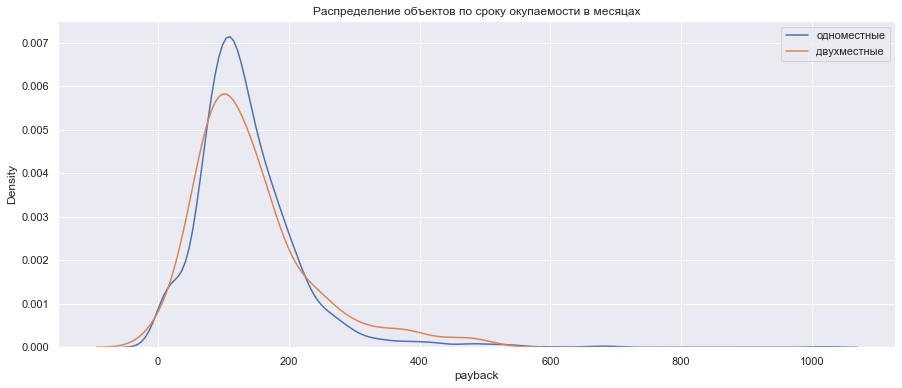

In [39]:
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=df_sel_single_slot, x='payback', ax=ax, label='одноместные')
sns.kdeplot(data=df_sel_duble_slot, x='payback', ax=ax, label='двухместные')
ax.set_title('Распределение объектов по сроку окупаемости в месяцах')
ax.legend(loc="upper right")
plt.show()

Теперь, когда мы знаем распределение объектов на аренду по кластерам, состаляем таблицу с характеристикой кластеров. Нас интересует инвестиционная привлекательность кластера. Примем, что кластер тем привлекательнее, чем выше в нем стоимость аренды и чем меньше в нем срок арендной экспозиции. Это следует из предположения о том, что если в определенном кластере сложилась высокая цена аренды, а объекты сдаются быстро, то в этом кластере есть повышенный спрос на аренду паркингов.

In [40]:
# для каждого кластера вычисляем среднюю стоимость аренды и медианный срок экспозиции объявлений
cluster_balance = pd.DataFrame(df_rent_single_slot
                               .groupby('rent_cluster')
                               .agg({'Цена':'mean',
                                     'expo':'median'}))
cluster_balance = cluster_balance.rename(columns={'Цена':'mean_rent_price',
                                                  'expo':'median_expo_period'})


# вычисляем рейтинг кластера. Медианную стоимость аренды и медианный срок экспозиции ранжируются от 0 до 1. 
# Где 1-максимальная стоимость аренды, 0 - минимальная
# Где 1-минимальный срок экспозиции, 0 - максимальный
# показатели суммируются и образуют рейтинг
cluster_balance['cluster_rating'] =\
(cluster_balance['mean_rent_price'] / cluster_balance['mean_rent_price'].max())+\
(1-(cluster_balance['median_expo_period'] / cluster_balance['median_expo_period'].max()))

# получим список лучших кластеров. Исходя из того, что рейтинг кластера лежит в диапазоне от 0 до 2,
# к лучшим отнесем те, чей рейтинг выше 1
best_clusters = cluster_balance.query('cluster_rating > 1').index
best_clusters

Int64Index([0, 3, 8, 12, 20, 22, 23, 24, 25, 33, 40, 41, 42, 46, 47, 49, 52, 53, 56, 62, 63, 64, 77, 78, 80, 81, 82, 88, 94, 95, 97, 99, 104, 109, 110, 111, 115, 117, 127, 130, 137, 140, 144, 146, 148, 149], dtype='int64', name='rent_cluster')

In [41]:
# добавим рейтинг кластера в таблицу с объектами
df_sel_single_slot = df_sel_single_slot.merge(cluster_balance.cluster_rating, on='rent_cluster')
df_sel_duble_slot = df_sel_duble_slot.merge(cluster_balance.cluster_rating, on='rent_cluster')

Отбросим из потенциальных объектов для инвестирования объекты типа "овощехранилище" и металлические гаражи, так как сдать в аренду проблематично. Выберем объекты, срок окупаемости которых не превышает 60 месяцев и отсортируем по убыванию рейтинга кластера.

In [42]:
df_sel_single_slot_interest = df_sel_single_slot.copy()
df_sel_duble_slot_interest = df_sel_duble_slot.copy()

# Отбросим из потенциальных объектов для инвестирования объекты типа "овощехранилище" и металлические гаражи
searchfor = ['овощехранилище', 'овощная', 'Овощехранилище', 'ОВОЩНАЯ', 
             'металлический', 'железный', 'Металлический',
             'контейнер', 'ячейка', 'ячейку',
             'кладовку', 'кладовка', 'келлер']

df_sel_nan.loc[:,'двойное_место'] = np.select([df_sel_nan['Описание'].str.contains('|'.join(searchfor))], [1], [0])

df_sel_single_slot_interest['Доп.параметры'] = \
np.where(df_sel_single_slot_interest['Доп.параметры'].isna(),
         'Нет доп.параметров',
         df_sel_single_slot_interest['Доп.параметры'])
                                
df_sel_single_slot_interest = \
df_sel_single_slot_interest[~df_sel_single_slot_interest['Доп.параметры'].str.contains('|'.join(searchfor))]

df_sel_single_slot_interest = \
df_sel_single_slot_interest[~df_sel_single_slot_interest['Описание'].str.contains('|'.join(searchfor))]

# то же самое для двухместных объектов
df_sel_duble_slot_interest['Доп.параметры'] = \
np.where(df_sel_duble_slot_interest['Доп.параметры'].isna(),
         'Нет доп.параметров',
         df_sel_duble_slot_interest['Доп.параметры'])
                                
df_sel_duble_slot_interest = \
df_sel_duble_slot_interest[~df_sel_duble_slot_interest['Доп.параметры'].str.contains('|'.join(searchfor))]

df_sel_duble_slot_interest = \
df_sel_duble_slot_interest[~df_sel_duble_slot_interest['Описание'].str.contains('|'.join(searchfor))]

# сортируем по убыванию рейтинга кластера
df_sel_single_slot_interest.sort_values('cluster_rating', ascending=False)

,Название,Цена,Дата,Описание,lat,lng,Доп.параметры,площадь,expo,rent_cluster,стоимость_аренды_в_кластере,payback,cluster_rating
856,"Гараж, 16 м²",700000,2022-10-17 18:16:44,"Гараж подземный находится в блоке во дворе дома по Степана Разина 24. Двор закрытый, заезд по звонку.",56.818828,60.608874,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=16,16.0,17,82,9000.0,78.0,1.528050
857,"Машиноместо, 20 м²",1199000,2022-10-09 10:22:02,"Цена снижена до конца октября, Продам машиноместо в паркинге Ул.Декабристов 75. Удобный паркинг, въезд по считывател...",56.822601,60.607239,Тип объявления=Продам|Вид объекта=Машиноместо|Тип машиноместа=Подземный паркинг|Охрана=Да|Площадь=20,20.0,25,82,9000.0,133.0,1.528050
854,"Машиноместо, 20 м²",1240000,2022-10-23 13:26:18,"Продам машиноместо в небольшом очень удобном подземном паркинге. Отличная вентиляция . Летом прохладно , зимой тепло...",56.822518,60.607259,Тип объявления=Продам|Вид объекта=Машиноместо|Тип машиноместа=Подземный паркинг|Охрана=Да|Площадь=20,20.0,11,82,9000.0,138.0,1.528050
853,"Гараж, 16 м²",590000,2022-10-25 05:25:11,"Продаётся капитальный гараж, площадь 16.1 кВ.м. Двери металлические , сам гараж бетонный . В хорошем месте . Практич...",56.820900,60.608181,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=16,16.0,9,82,9000.0,66.0,1.528050
852,"Гараж, 18 м²",550000,2022-10-25 06:52:48,"Продам капитальный гараж. Закрытая территория, свет,ямы нет. Собственник!",56.820427,60.610165,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=18,18.0,9,82,9000.0,61.0,1.528050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,"Машиноместо, 14 м²",500000,2022-10-17 07:47:06,Продам 3 машиноместа на 2 уровне Паркинг ЖК «Квартет» Цена за 1 место Продажа от собственника. Круглосуточная охрана...,56.876087,60.525088,Тип объявления=Продам|Вид объекта=Машиноместо|Тип машиноместа=Многоуровневый паркинг|Охрана=Да|Площадь=14,14.0,17,30,2500.0,200.0,0.198532
972,"Гараж, 23 м²",650000,2022-10-28 16:01:03,"Продается бокс в капитальном гараже по адресу ул. Расточная 34, этаж второй, первый заезд. Состояние хорошее. Удобно...",56.881606,60.520336,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Кирпичный|Охрана=Нет|Площадь=23,23.0,6,30,2500.0,260.0,0.198532
971,"Гараж в Свердловская область, Екатеринбург Старая Сортировка мкр, (14.4 м²)",180000,2022-10-31 20:54:13,"Продам машиноместо на парковке 3 этаж, 5 уровень. Удобное расположение, круглосуточная охрана, автоматические ворота...",56.876825,60.520866,Тип объявления=Продам|Вид объекта=Гараж|Площадь=14.4,14.4,3,30,2500.0,72.0,0.198532
970,"Гараж в Свердловская область, Екатеринбург Старая Сортировка мкр, ул. Таежная, 4 (14.0 м²)",450000,2022-10-31 21:55:25,Продам машиноместо по адресу ул.Таежная с.4/2 в подземном паркинге с круглосуточной охраной.,56.874233,60.523669,Тип объявления=Продам|Вид объекта=Гараж|Площадь=14.0,14.0,3,30,2500.0,180.0,0.198532


In [43]:
# Выберем объекты, срок окупаемости которых не превышает 60 месяцев
objects_single = df_sel_single_slot_interest.query('payback <= 60')
objects_duble = df_sel_duble_slot_interest.query('payback <= 60')

# и из них те, что относятся к наиболее привлекательным кластерам
objects_single = objects_single.query('rent_cluster in(@best_clusters)', engine = 'python')
objects_duble = objects_duble.query('rent_cluster in(@best_clusters)', engine = 'python')
print('Количество объектов для рассмотрения среди одноместных:', len(objects_single))
print('Количество объектов для рассмотрения среди двухместных:', len(objects_duble))
display(df_sel_initial.loc[objects_single.index].head(2))
display(df_sel_initial.loc[objects_duble.index].head(2))

Количество объектов для рассмотрения среди одноместных: 44
Количество объектов для рассмотрения среди двухместных: 9


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,Адрес,Описание,Тип объявления,Категория1,Категория2,ID на сайте,Источник,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км"
58,"Гараж в Свердловская область, Екатеринбург ул. Щербакова, 77к1 (27.0 м²)",430000,2022-11-03 07:53:26,89826318985,Мобильные ТелеСистемы,ID96161428,Агентство,Свердловская область,Екатеринбург,Ботаническая,"ул. Щербакова, 77к1","Подземный паркинг на -4 этаже. Имеется вход из подъезда. Весной и осенью сухо, зимой тепло Место выделено из общей д...",Продам,Недвижимость,Гаражи и машиноместа,278666545,cian.ru,56.777543,60.660896,NaN,Тип объявления=Продам|Вид объекта=Гараж|Площадь=27.0,https://www.cian.ru/sale/commercial/278666545,"https://cdn-p.cian.site/images/25/529/831/garazh-ekaterinburg-ulica-shcerbakova-1389255270-1.jpg,https://cdn-p.cian....",Свердловская область,да,3.667
63,"Гараж в Свердловская область, Екатеринбург пер. Широкий, 6 (19.8 м²)",370000,2022-11-03 07:53:25,89826513741,Мобильные ТелеСистемы,Штаб квартир,Агентство,Свердловская область,Екатеринбург,Чкаловский,"пер. Широкий, 6","Продается машиноместо (44) в ЖК Сириус - 19,8 кв.м. Расположено непосредственно перед входом/выходом в лифтовой холл...",Продам,Недвижимость,Гаражи и машиноместа,266663316,cian.ru,56.783140,60.651167,NaN,Тип объявления=Продам|Вид объекта=Гараж|Площадь=19.8,https://www.cian.ru/sale/commercial/266663316,"https://cdn-p.cian.site/images/69/589/711/1179859609-1.jpg,https://cdn-p.cian.site/images/69/589/711/1179859614-1.jp...",Свердловская область,да,неизвестно


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,Адрес,Описание,Тип объявления,Категория1,Категория2,ID на сайте,Источник,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км"
14,"Гараж в Свердловская область, Екатеринбург ул. Краснолесья, 54/3 (14.1 м²)",850000,2022-11-03 16:55:17,89655293226,Вымпел-Коммуникации,Куртюкова Валентина (Этажи Екатеринбург),Агентство,Свердловская область,Екатеринбург,Ленинский,"ул. Краснолесья, 54/3","Продается подземный паркинг на -1 уровне по адресу ул. Краснолесья, 54/3. Паркинг тёплый, чистый, светлый. Удобный с...",Продам,Недвижимость,Гаражи и машиноместа,279713714,cian.ru,56.785413,60.538338,NaN,Тип объявления=Продам|Вид объекта=Гараж|Площадь=14.1,https://www.cian.ru/sale/commercial/279713714,"https://cdn-p.cian.site/images/46/959/041/1409596467-1.jpg,https://cdn-p.cian.site/images/46/959/041/1409596472-1.jp...",Свердловская область,да,неизвестно
64,"Гараж в Свердловская область, Екатеринбург пер. Широкий, 6 (15.0 м²)",690000,2022-11-03 07:53:25,89826883990,Мобильные ТелеСистемы,ssk.ur@mail.ru,Агентство,Свердловская область,Екатеринбург,Чкаловский,"пер. Широкий, 6","Подземный паркинг в жк ""Сириус"" парковочные места на 2 автомобиля (семейные).",Продам,Недвижимость,Гаражи и машиноместа,266284838,cian.ru,56.783140,60.651167,NaN,Тип объявления=Продам|Вид объекта=Гараж|Площадь=15.0,https://www.cian.ru/sale/commercial/266284838,"https://cdn-p.cian.site/images/57/555/711/1175557528-1.jpg,https://cdn-p.cian.site/images/57/555/711/1175557546-1.jpg",Свердловская область,да,неизвестно


In [44]:
best_clusters = rent_clusters.loc[best_clusters].merge(cluster_balance.cluster_rating, on='rent_cluster')

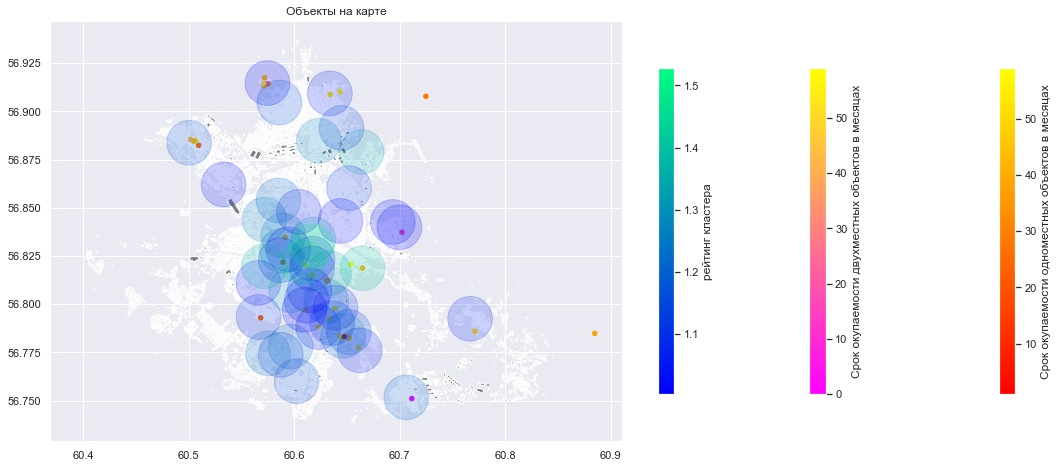

In [45]:
loc_geom_single_objects = [Point(xy) for xy in zip(objects_single['lng'], objects_single['lat'])]
geo_loc_geom_single_objects = gpd.GeoDataFrame(objects_single, crs=loc_crs, geometry=loc_geom_single_objects)

loc_geom_duble_objects = [Point(xy) for xy in zip(objects_duble['lng'], objects_duble['lat'])]
geo_loc_geom_duble_objects = gpd.GeoDataFrame(objects_duble, crs=loc_crs, geometry=loc_geom_duble_objects)

loc_geom_rent_clusters = [Point(xy) for xy in zip(best_clusters['lng'], 
                                                  best_clusters['lat'])]
geo_rent_clusters = gpd.GeoDataFrame(best_clusters, crs=loc_crs, geometry=loc_geom_rent_clusters)

fig, ax = plt.subplots(figsize = (20,20))
city_map.plot(ax=ax, color='grey')

geo_loc_geom_single_objects.plot(column = 'payback', 
                                ax=ax, 
                                cmap = 'autumn',
                                legend = True, 
                                legend_kwds={'shrink': 0.3, 
                                    'label':"Срок окупаемости одноместных объектов в месяцах"},
                                markersize = 20)

geo_loc_geom_duble_objects.plot(column = 'payback', 
                                ax=ax, 
                                cmap = 'spring',
                                legend = True, 
                                legend_kwds={'shrink': 0.3, 
                                    'label':"Срок окупаемости двухместных объектов в месяцах"},
                                markersize = 20)

geo_rent_clusters.plot(column = 'cluster_rating', 
                       ax=ax, 
                       cmap = 'winter',
                       legend = True, 
                       legend_kwds={'shrink': 0.3, 
                                    'label':"рейтинг кластера"},
                       markersize = 2000,
                       alpha = .2)
ax.set_title('Объекты на карте')
plt.savefig('Heat Map')

## Выборочный анализ результатов

В этой главе посмотрим, что представляет из себя выборочный объект из тех, что были определены нами как перспективные. Для простоты соединим две таблицы (с одноместными и двухместными) таблицами в одну.

In [46]:
objects = objects_single.append(objects_duble)

In [47]:
objects

,Название,Цена,Дата,Описание,lat,lng,Доп.параметры,площадь,expo,rent_cluster,стоимость_аренды_в_кластере,payback,cluster_rating,geometry
58,"Гараж в Свердловская область, Екатеринбург тракт Сибирский (18.0 м²)",200000,2022-11-03 21:54:26,Подробности по телефону.,56.786005,60.771307,Тип объявления=Продам|Вид объекта=Гараж|Площадь=18.0,18.0,0,25,3900.000000,51.0,1.074377,POINT (60.77131 56.78601)
63,"Гараж в Свердловская область, Екатеринбург муниципальное образование, пос. Исток (18.0 м²)",150000,2022-11-02 16:54:25,"Продажа каритального гаража, реальному покупателю торг.",56.784881,60.884872,Тип объявления=Продам|Вид объекта=Гараж|Площадь=18.0,18.0,1,25,3900.000000,38.0,1.074377,POINT (60.88487 56.78488)
132,"Гараж в Свердловская область, Екатеринбург Уралмаш мкр, ул. Коммунистическая, 143 (19.0 м²)",175000,2022-11-02 03:54:07,"Район Уралмаш. Размер гаража 3*6. 19кв Бетонированный, есть электричество Собственность.",56.917416,60.571980,Тип объявления=Продам|Вид объекта=Гараж|Площадь=19.0,19.0,2,53,4071.428571,43.0,1.002372,POINT (60.57198 56.91742)
137,"Гараж, 18 м²",80000,2022-10-21 16:35:46,"Я собственник. Гараж находится в 4м заезде, немного дальше указанного адреса. Крыша не течет (ремонт год назад). Пол...",56.914021,60.573310,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=18,18.0,13,53,4071.428571,20.0,1.002372,POINT (60.57331 56.91402)
140,"Гараж, 19 м²",200000,2022-10-15 21:07:46,"Продам капитальный гараж, 2 ямы, свет, всё зарегистрировано в собственности.",56.914181,60.575937,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Да|Площадь=19,19.0,19,53,4071.428571,49.0,1.002372,POINT (60.57594 56.91418)
142,"Гараж, 18 м²",180000,2022-10-12 17:49:39,Продам 2 гаража рядом друг с другом . Гаражи в стадий привотизацый документы готовятся . Свет временно отсутствует н...,56.913291,60.571570,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=18,18.0,22,53,4071.428571,44.0,1.002372,POINT (60.57157 56.91329)
144,"Гараж, 18 м²",210000,2022-10-06 09:26:44,"Продам гараж 18м на улице Коммунистической, 151. Есть смотровая яма и погреб, электричество можно провести. Приватиз...",56.914096,60.571463,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Да|Площадь=18,18.0,28,53,4071.428571,52.0,1.002372,POINT (60.57146 56.91410)
145,"Гараж, 13 м²",200000,2022-10-05 17:18:17,Продам гараж с овощной ямой. Можно с арендаторами (платят 3500 в месяц ) взнос в кооператив 1000 в год .,56.914283,60.573885,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=13,13.0,29,53,4071.428571,49.0,1.002372,POINT (60.57389 56.91428)
337,"Гараж, 10 м²",100000,2022-10-08 15:42:53,"Ямка капитальная, кирпич, 3.5кв.м. в центре города, сухая, в ямочном комплексе по адресу Шейнкмана 112а.",56.821868,60.589372,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Кирпичный|Охрана=Нет|Площадь=10,10.0,26,56,6000.000000,17.0,1.063144,POINT (60.58937 56.82187)
542,"Гараж, 22 м²",250000,2022-10-31 18:29:29,Продам гараж! Смотровая яма овощьна! Гараж сухой!,56.908768,60.634144,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=22,22.0,3,42,4833.333333,52.0,1.069385,POINT (60.63414 56.90877)


In [50]:
object_example = 144
object_example_cluster = objects.loc[object_example, 'rent_cluster']
print('Рассматриваем объект под номером', object_example)
print('В кластере, где находится этот объект так же продаются следующие объекты-конкуренты')
concurents = (
    objects_single.query('rent_cluster == @object_example_cluster')
    .append(objects_duble.query('rent_cluster == @object_example_cluster')))
display(concurents)

Рассматриваем объект под номером 144
В кластере, где находится этот объект так же продаются следующие объекты-конкуренты


,Название,Цена,Дата,Описание,lat,lng,Доп.параметры,площадь,expo,rent_cluster,стоимость_аренды_в_кластере,payback,cluster_rating,geometry
132,"Гараж в Свердловская область, Екатеринбург Уралмаш мкр, ул. Коммунистическая, 143 (19.0 м²)",175000,2022-11-02 03:54:07,"Район Уралмаш. Размер гаража 3*6. 19кв Бетонированный, есть электричество Собственность.",56.917416,60.571980,Тип объявления=Продам|Вид объекта=Гараж|Площадь=19.0,19.0,2,53,4071.428571,43.0,1.002372,POINT (60.57198 56.91742)
137,"Гараж, 18 м²",80000,2022-10-21 16:35:46,"Я собственник. Гараж находится в 4м заезде, немного дальше указанного адреса. Крыша не течет (ремонт год назад). Пол...",56.914021,60.573310,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=18,18.0,13,53,4071.428571,20.0,1.002372,POINT (60.57331 56.91402)
140,"Гараж, 19 м²",200000,2022-10-15 21:07:46,"Продам капитальный гараж, 2 ямы, свет, всё зарегистрировано в собственности.",56.914181,60.575937,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Да|Площадь=19,19.0,19,53,4071.428571,49.0,1.002372,POINT (60.57594 56.91418)
142,"Гараж, 18 м²",180000,2022-10-12 17:49:39,Продам 2 гаража рядом друг с другом . Гаражи в стадий привотизацый документы готовятся . Свет временно отсутствует н...,56.913291,60.571570,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=18,18.0,22,53,4071.428571,44.0,1.002372,POINT (60.57157 56.91329)
144,"Гараж, 18 м²",210000,2022-10-06 09:26:44,"Продам гараж 18м на улице Коммунистической, 151. Есть смотровая яма и погреб, электричество можно провести. Приватиз...",56.914096,60.571463,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Да|Площадь=18,18.0,28,53,4071.428571,52.0,1.002372,POINT (60.57146 56.91410)
145,"Гараж, 13 м²",200000,2022-10-05 17:18:17,Продам гараж с овощной ямой. Можно с арендаторами (платят 3500 в месяц ) взнос в кооператив 1000 в год .,56.914283,60.573885,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=13,13.0,29,53,4071.428571,49.0,1.002372,POINT (60.57389 56.91428)
155,"Гараж, > 30 м²",170000,2022-10-27 16:13:31,Продам два рядомстоящих гаража.Высокий потолок.Требуется провести кровельные работы и залить пол.Электричество есть....,56.914325,60.574244,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Да|Площадь=> 30,30.0,7,53,4071.428571,21.0,1.002372,POINT (60.57424 56.91432)
156,"Гараж, > 30 м²",450000,2022-10-26 16:20:54,Продам два соседних гаража общей площадью 36м.кв. (2по 18м.кв.) ямы в обоих гаражах есть смотровые и овощные. Гаражи...,56.914274,60.571448,Тип объявления=Продам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=> 30,30.0,8,53,4071.428571,55.0,1.002372,POINT (60.57145 56.91427)


In [51]:
print('а так же сдаются в аренду следующие объекты:')
object_to_check_rent_neighbors = df_rent_single_slot.query('rent_cluster == @object_example_cluster')
object_to_check_rent_neighbors

а так же сдаются в аренду следующие объекты:


,Название,Цена,Дата,Описание,lat,lng,Доп.параметры,площадь,expo,rent_cluster,geometry
209,"Гараж, 19 м²",4000,2022-10-31 09:06:40,Сдам гараж сухой высокие потолки,56.914470,60.574501,Тип объявления=Сдам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=19,19.0,3,53,POINT (60.57450 56.91447)
230,"Гараж, 20 м²",3500,2022-10-30 11:40:59,"Сдам гараж, удобный подьезд, подробности по телефону",56.914502,60.576840,Тип объявления=Сдам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=20,20.0,4,53,POINT (60.57684 56.91450)
234,"Гараж, 20 м²",4000,2022-10-30 09:56:20,"сдам капитальный гараж на длительный срок, площадь 20м2 - от 4-х месяцев (при заключении договора аренды оплата сраз...",56.915531,60.574585,Тип объявления=Сдам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=20,20.0,4,53,POINT (60.57458 56.91553)
557,"Гараж, 20 м²",3500,2022-10-17 07:11:34,"Сдам гараж на длительный срок, в идеале под хранение вещей, транспорта, и т.п. Пол бетон, есть овощная яма. Рядом у ...",56.915253,60.574834,Тип объявления=Сдам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=20,20.0,17,53,POINT (60.57483 56.91525)
742,"Гараж, 18 м²",5000,2022-10-09 14:14:56,Все дополнительные фотографии через сообщения.,56.914505,60.576839,Тип объявления=Сдам|Вид объекта=Гараж|Тип гаража=Кирпичный|Охрана=Нет|Площадь=18,18.0,25,53,POINT (60.57684 56.91450)
764,"Гараж, 21 м²",3500,2022-10-08 14:29:47,"Капитальный гараж 7*3 Электричество, два замка. Под хранение вещей или склад. Гараж абсолютно пустой, без хлама.",56.914931,60.575415,Тип объявления=Сдам|Вид объекта=Гараж|Тип гаража=Железобетонный|Охрана=Нет|Площадь=21,21.0,26,53,POINT (60.57542 56.91493)
913,Гараж,5000,2022-10-26 11:53:00,"сдам на длительный срок, гараж сухой, крыша не протекает, ворота хорошо открываются, круглосуточная охрана, видеонаб...",56.913525,60.569681,NaN,NaN,8,53,POINT (60.56968 56.91352)


Ссылка на объект:  https://www.avito.ru/ekaterinburg/garazhi_i_mashinomesta/garazh_18m_2446232871


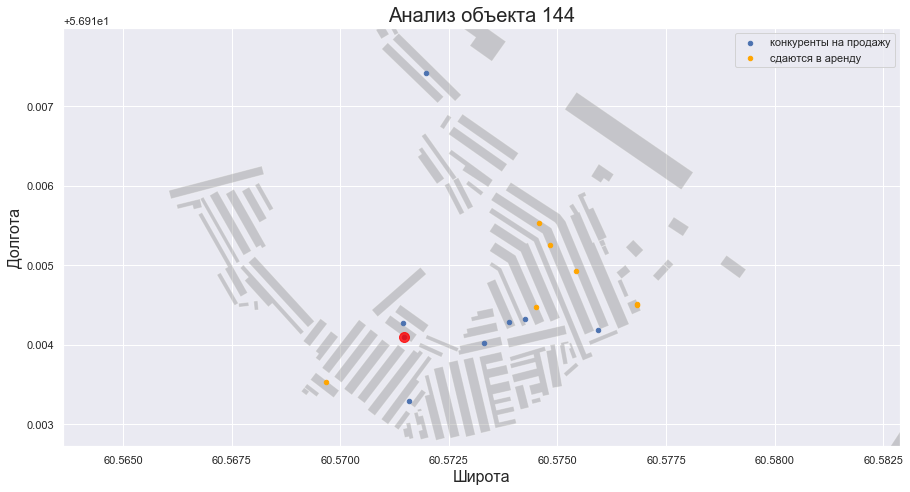

In [54]:
print('Ссылка на объект: ', df_sel_initial.loc[object_example, 'URL'])

fig, ax = plt.subplots(figsize = (15,15))

plt.rcParams['font.size'] = '16'

object_to_check = pd.DataFrame(objects.loc[object_example]).T

loc_geom_object_to_check = [Point(xy) for xy in zip(object_to_check['lng'], object_to_check['lat'])]
geo_loc_object_to_check = gpd.GeoDataFrame(object_to_check, crs=loc_crs, geometry=loc_geom_object_to_check)

loc_geom_objects_concurents = [Point(xy) for xy in zip(concurents['lng'], concurents['lat'])]
geo_loc_geom_objects_concurents = gpd.GeoDataFrame(concurents, crs=loc_crs, geometry=loc_geom_objects_concurents)

loc_geom_rent_neighbors = [Point(xy) for xy in zip(object_to_check_rent_neighbors['lng'], object_to_check_rent_neighbors['lat'])]
geo_loc_rent_neighbors = gpd.GeoDataFrame(object_to_check_rent_neighbors, crs=loc_crs, geometry=loc_geom_rent_neighbors)

city_map.plot(ax=ax, color='grey', alpha=0.35)

geo_loc_geom_objects_concurents.plot(ax=ax, 
                                     label='конкуренты на продажу',
                                     markersize = 20)

geo_loc_rent_neighbors.plot(ax=ax, 
                            label='сдаются в аренду',
                            color='orange',
                            markersize = 20)

geo_loc_object_to_check.plot(ax=ax, 
                             color = 'red',
                             markersize = 100,
                             alpha = .8)

x_min = 0.9999*min(concurents.lng.min(), object_to_check_rent_neighbors.lng.min()) 
x_max = 1.0001*max(concurents.lng.max(), object_to_check_rent_neighbors.lng.max())
y_min = 0.99999*min(concurents.lat.min(), object_to_check_rent_neighbors.lat.min()) 
y_max = 1.00001*max(concurents.lat.max(), object_to_check_rent_neighbors.lat.max())

ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)

ax.set_title(f'Анализ объекта {object_example}', fontsize=20)
ax.set_xlabel('Широта', fontsize=16)
ax.set_ylabel('Долгота', fontsize=16)
ax.legend()

plt.show()

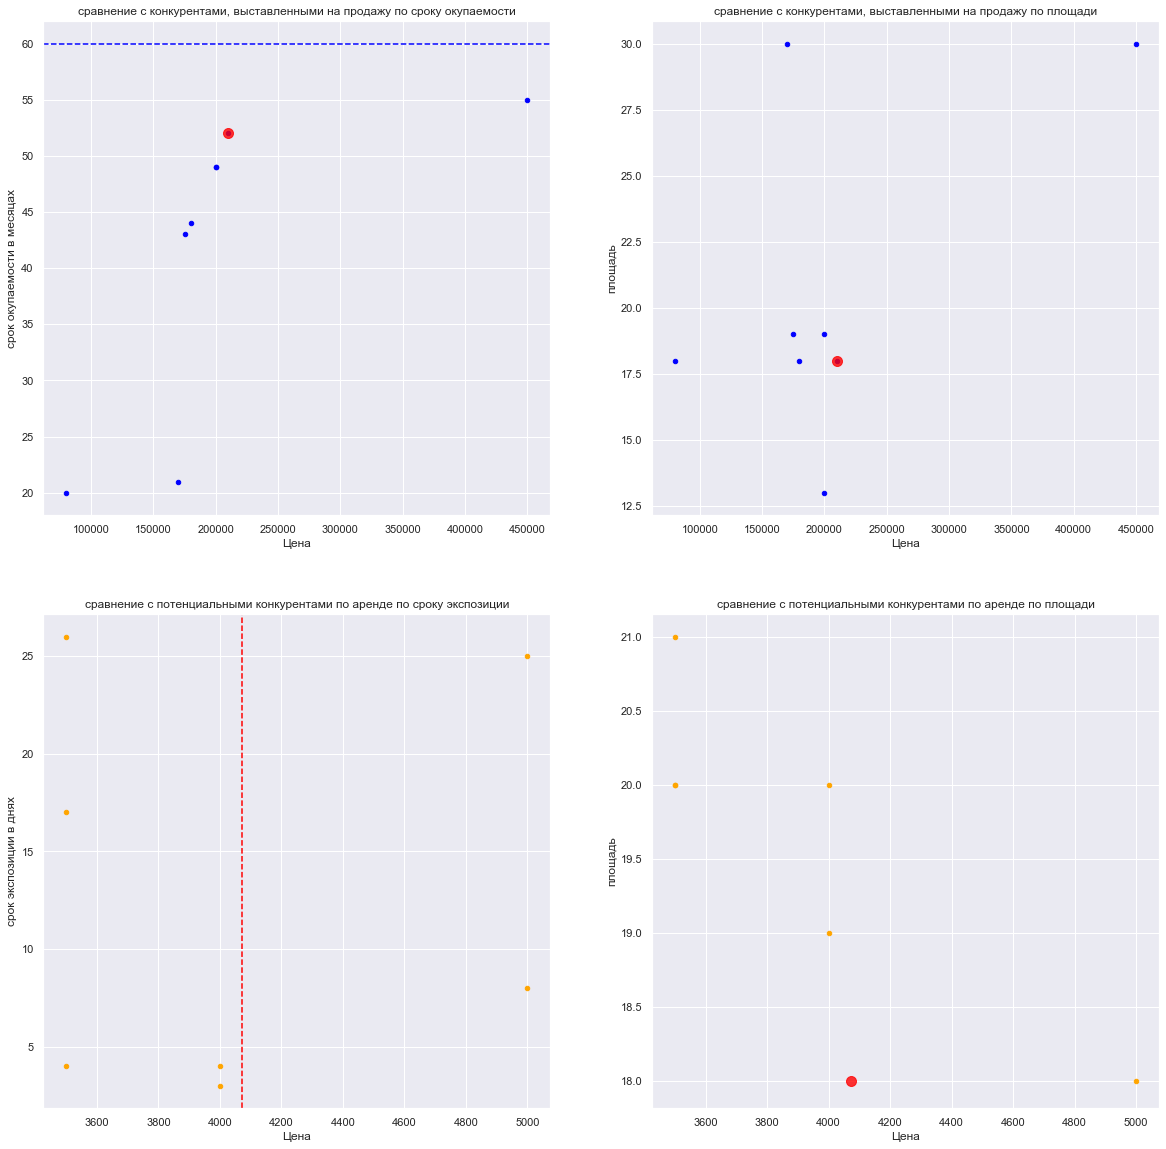

In [53]:
#print('Ссылка на объект: ', df_sel_initial.loc[object_example, 'URL'])

fig = plt.figure(figsize=(20,20))


# сравнение с конкурентами, выставленными на продажу по сроку окупаемости
ax2 = fig.add_subplot(2, 2, 1)
concurents.plot(ax=ax2,
                kind='scatter',
                x='Цена',
                y='payback',
                color = 'blue')
pd.DataFrame(objects.loc[object_example]).T.plot(ax=ax2,
                                                 kind='scatter',
                                                 x='Цена',
                                                 y='payback',
                                                 color = 'red',
                                                 alpha=0.8,
                                                 s=100)
plt.axhline(y = 60, color = 'blue', linestyle = '--')

ax2.set_title(f'сравнение с конкурентами, выставленными на продажу по сроку окупаемости')
ax2.set_xlabel('Цена')
ax2.set_ylabel('срок окупаемости в месяцах')

# сравнение с конкурентами, выставленными на продажу по площади
ax3 = fig.add_subplot(2, 2, 2)
concurents.plot(ax=ax3,
                kind='scatter',
                x='Цена',
                y='площадь',
                color = 'blue')
pd.DataFrame(objects.loc[object_example]).T.plot(ax=ax3,
                kind='scatter',
                x='Цена',
                y='площадь',
                color = 'red',
                alpha=0.8,
                s=100)

ax3.set_title(f'сравнение с конкурентами, выставленными на продажу по площади')
ax3.set_xlabel('Цена')
ax3.set_ylabel('площадь')
# сравнение с потенциальными конкурентами по аренде по сроку экспозиции
ax4 = fig.add_subplot(2, 2, 3)
object_to_check_rent_neighbors.plot(ax=ax4,
                kind='scatter',
                x='Цена',
                y='expo',
                color = 'orange')
plt.axvline(x = objects.loc[object_example, 'стоимость_аренды_в_кластере'], color = 'red', linestyle = '--')

ax4.set_title(f'сравнение с потенциальными конкурентами по аренде по сроку экспозиции')
ax4.set_xlabel('Цена')
ax4.set_ylabel('срок экспозиции в днях')

# сравнение с потенциальными конкурентами по аренде по площади
ax5 = fig.add_subplot(2, 2, 4)
object_to_check_rent_neighbors.plot(ax=ax5,
                kind='scatter',
                x='Цена',
                y='площадь',
                color = 'orange')
pd.DataFrame(objects.loc[object_example]).T.plot(ax=ax5,
                kind='scatter',
                x='стоимость_аренды_в_кластере',
                y='площадь',
                color = 'red',
                alpha=0.8,
                s=100)

ax5.set_title(f'сравнение с потенциальными конкурентами по аренде по площади')
ax5.set_xlabel('Цена')
ax5.set_ylabel('площадь')


plt.show()

## Выводы.

В результате проделанной работы из 2200 объявлений о продаже гаражей и паркингов выбрали 53 интересных для инвестирования объекта. Это кардинальным образом облегчает подбор объекта для инвестиций, принимая во внимание, что селекция основана на том, чтобы вложения инвесторов окупались максимально быстро, а приобретаемые объекты были востребованы на арендном рынке.

Помимо решенной главной задачи, у нас получилось выделить такие области на карте города, где складывается дефицит предложения по аренде паркингов и формируются высокие цены. Эта информация могла бы быть полезной для лиц, занимающихся строительством при определении цены продажи своих объектов.

Кроме того, получили инструмент для краткого наглядного анализа конкретного объекта.
